<div style="text-align: center;">
    <h1>Car price</h1>
</div>


## Data Understanding 
**Attribute Information:**

**1)** Car_ID: Unique id of each observation (Integer) 

**2)** Symboling: Its assigned insurance risk rating, A value of +3 indicates that the auto is risky, -3 that it is probably pretty safe. (Categorical) 

**3)** carCompany: Name of a car company (Categorical) 

**4)** fueltype: Car fuel type i.e gas or diesel (Categorical) 

**5)** aspiration: Aspiration used in a car (Categorical) 

**6)** doornumber: Number of doors in a car (Categorical) 

**7)** carbody: the body of the car (Categorical) 

**8)** drivewheel: type of drive wheel (Categorical) 

**9)** enginelocation: Location of a car engine (Categorical) 

**10)** wheelbase: Wheelbase of a car (Numeric) 

**11)** carlength: Length of the car (Numeric) 

**12)** carwidth: Width of the car (Numeric) 

**13)** carheight: height of car (Numeric) 

**14)** curbweight: The weight of a car without occupants or baggage. (Numeric) 

**15)** enginetype: Type of engine. (Categorical) 

**16)** cylindernumber: cylinder placed in the car (Categorical) 

**17)** enginesize: Size of the car (Numeric) 

**18)** fuelsystem: Fuel system of car (Categorical) 

**19)** boreratio: Boreratio of a car (Numeric) 

**20)** stroke: Stroke or volume inside the engine (Numeric) 

**21)** compressionratio: compression ratio of a car (Numeric)

**22)** horsepower: Horsepower (Numeric) 

**23)** peakrpm: car peak rpm (Numeric) 

**24)** citympg: Mileage in the city (Numeric) 

**25)** highwaympg: Mileage on highway (Numeric) 

**26)** price: Price of the car (Numeric)(Dependent variable)

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler,StandardScaler,LabelEncoder,PolynomialFeatures
from sklearn.model_selection import train_test_split,GridSearchCV,KFold

import statsmodels.api as sm
from sklearn import linear_model
import scipy.stats as stats
from scipy.stats import norm, skew 

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression 
from statsmodels.stats.outliers_influence import variance_inflation_factor

from warnings import filterwarnings
filterwarnings("ignore")

In [2]:
df = pd.read_csv(r"I:/Datas/Cars_price/CarPrice_Assignment.csv")
df

car_ID  symboling                   CarName fueltype aspiration  \
0         1          3        alfa-romero giulia      gas        std   
1         2          3       alfa-romero stelvio      gas        std   
2         3          1  alfa-romero Quadrifoglio      gas        std   
3         4          2               audi 100 ls      gas        std   
4         5          2                audi 100ls      gas        std   
..      ...        ...                       ...      ...        ...   
200     201         -1           volvo 145e (sw)      gas        std   
201     202         -1               volvo 144ea      gas      turbo   
202     203         -1               volvo 244dl      gas        std   
203     204         -1                 volvo 246   diesel      turbo   
204     205         -1               volvo 264gl      gas      turbo   

    doornumber      carbody drivewheel enginelocation  wheelbase  ...  \
0          two  convertible        rwd          front       88.6  ...   
1          two  convertible        rwd          front       88.6  ...   
2          two    hatchback        rwd          front       94.5  ...   
3         four        sedan        fwd          front       99.8  ...   
4         four        sedan        4wd          front       99.4  ...   
..         ...          ...        ...            ...        ...  ...   
200       four        sedan        rwd          front      109.1  ...   
201       four        sedan        rwd          front      109.1  ...   
202       four        sedan        rwd          front      109.1  ...   
203       four        sedan        rwd          front      109.1  ...   
204       four        sedan        rwd          front      109.1  ...   

     enginesize  fuelsystem  boreratio  stroke compressionratio horsepower  \
0           130        mpfi       3.47    2.68              9.0        111   
1           130        mpfi       3.47    2.68              9.0        111   
2           152        mpfi       2.68    3.47              9.0        154   
3           109        mpfi       3.19    3.40             10.0        102   
4           136        mpfi       3.19    3.40              8.0        115   
..          ...         ...        ...     ...              ...        ...   
200         141        mpfi       3.78    3.15              9.5        114   
201         141        mpfi       3.78    3.15              8.7        160   
202         173        mpfi       3.58    2.87              8.8        134   
203         145         idi       3.01    3.40             23.0        106   
204         141        mpfi       3.78    3.15              9.5        114   

     peakrpm citympg  highwaympg    price  
0       5000      21          27  13495.0  
1       5000      21          27  16500.0  
2       5000      19          26  16500.0  
3       5500      24          30  13950.0  
4       5500      18          22  17450.0  
..       ...     ...         ...      ...  
200     5400      23          28  16845.0  
201     5300      19          25  19045.0  
202     5500      18          23  21485.0  
203     4800      26          27  22470.0  
204     5400      19          25  22625.0  

[205 rows x 26 columns]

In [3]:
print("The features is:{}".format(df.columns))
df.shape

The features is:Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')


(205, 26)

In [4]:
df.describe().T

count          mean          std      min      25%  \
car_ID            205.0    103.000000    59.322565     1.00    52.00   
symboling         205.0      0.834146     1.245307    -2.00     0.00   
wheelbase         205.0     98.756585     6.021776    86.60    94.50   
carlength         205.0    174.049268    12.337289   141.10   166.30   
carwidth          205.0     65.907805     2.145204    60.30    64.10   
carheight         205.0     53.724878     2.443522    47.80    52.00   
curbweight        205.0   2555.565854   520.680204  1488.00  2145.00   
enginesize        205.0    126.907317    41.642693    61.00    97.00   
boreratio         205.0      3.329756     0.270844     2.54     3.15   
stroke            205.0      3.255415     0.313597     2.07     3.11   
compressionratio  205.0     10.142537     3.972040     7.00     8.60   
horsepower        205.0    104.117073    39.544167    48.00    70.00   
peakrpm           205.0   5125.121951   476.985643  4150.00  4800.00   
citympg           205.0     25.219512     6.542142    13.00    19.00   
highwaympg        205.0     30.751220     6.886443    16.00    25.00   
price             205.0  13276.710571  7988.852332  5118.00  7788.00   

                       50%       75%       max  
car_ID              103.00    154.00    205.00  
symboling             1.00      2.00      3.00  
wheelbase            97.00    102.40    120.90  
carlength           173.20    183.10    208.10  
carwidth             65.50     66.90     72.30  
carheight            54.10     55.50     59.80  
curbweight         2414.00   2935.00   4066.00  
enginesize          120.00    141.00    326.00  
boreratio             3.31      3.58      3.94  
stroke                3.29      3.41      4.17  
compressionratio      9.00      9.40     23.00  
horsepower           95.00    116.00    288.00  
peakrpm            5200.00   5500.00   6600.00  
citympg              24.00     30.00     49.00  
highwaympg           30.00     34.00     54.00  
price             10295.00  16503.00  45400.00

In [5]:
df.dtypes

car_ID                int64
symboling             int64
CarName              object
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object

In [6]:
df.groupby('carbody')['price'].mean()

carbody
convertible    21890.500000
hardtop        22208.500000
hatchback      10376.652386
sedan          14344.270833
wagon          12371.960000
Name: price, dtype: float64

In [7]:
df.drop('car_ID', axis=1, inplace=True)
df.head(5)

symboling                   CarName fueltype aspiration doornumber  \
0          3        alfa-romero giulia      gas        std        two   
1          3       alfa-romero stelvio      gas        std        two   
2          1  alfa-romero Quadrifoglio      gas        std        two   
3          2               audi 100 ls      gas        std       four   
4          2                audi 100ls      gas        std       four   

       carbody drivewheel enginelocation  wheelbase  carlength  ...  \
0  convertible        rwd          front       88.6      168.8  ...   
1  convertible        rwd          front       88.6      168.8  ...   
2    hatchback        rwd          front       94.5      171.2  ...   
3        sedan        fwd          front       99.8      176.6  ...   
4        sedan        4wd          front       99.4      176.6  ...   

   enginesize  fuelsystem  boreratio stroke compressionratio  horsepower  \
0         130        mpfi       3.47   2.68              9.0         111   
1         130        mpfi       3.47   2.68              9.0         111   
2         152        mpfi       2.68   3.47              9.0         154   
3         109        mpfi       3.19   3.40             10.0         102   
4         136        mpfi       3.19   3.40              8.0         115   

  peakrpm  citympg  highwaympg    price  
0    5000       21          27  13495.0  
1    5000       21          27  16500.0  
2    5000       19          26  16500.0  
3    5500       24          30  13950.0  
4    5500       18          22  17450.0  

[5 rows x 25 columns]

## Missing value Detection

In [8]:
df.isnull().sum()

symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [9]:
df_col_num = df.select_dtypes(include='number')
df_col_num

symboling  wheelbase  carlength  carwidth  carheight  curbweight  \
0            3       88.6      168.8      64.1       48.8        2548   
1            3       88.6      168.8      64.1       48.8        2548   
2            1       94.5      171.2      65.5       52.4        2823   
3            2       99.8      176.6      66.2       54.3        2337   
4            2       99.4      176.6      66.4       54.3        2824   
..         ...        ...        ...       ...        ...         ...   
200         -1      109.1      188.8      68.9       55.5        2952   
201         -1      109.1      188.8      68.8       55.5        3049   
202         -1      109.1      188.8      68.9       55.5        3012   
203         -1      109.1      188.8      68.9       55.5        3217   
204         -1      109.1      188.8      68.9       55.5        3062   

     enginesize  boreratio  stroke  compressionratio  horsepower  peakrpm  \
0           130       3.47    2.68               9.0         111     5000   
1           130       3.47    2.68               9.0         111     5000   
2           152       2.68    3.47               9.0         154     5000   
3           109       3.19    3.40              10.0         102     5500   
4           136       3.19    3.40               8.0         115     5500   
..          ...        ...     ...               ...         ...      ...   
200         141       3.78    3.15               9.5         114     5400   
201         141       3.78    3.15               8.7         160     5300   
202         173       3.58    2.87               8.8         134     5500   
203         145       3.01    3.40              23.0         106     4800   
204         141       3.78    3.15               9.5         114     5400   

     citympg  highwaympg    price  
0         21          27  13495.0  
1         21          27  16500.0  
2         19          26  16500.0  
3         24          30  13950.0  
4         18          22  17450.0  
..       ...         ...      ...  
200       23          28  16845.0  
201       19          25  19045.0  
202       18          23  21485.0  
203       26          27  22470.0  
204       19          25  22625.0  

[205 rows x 15 columns]

In [10]:
type(df_col_num)

pandas.core.frame.DataFrame

In [11]:
df1 = df #copy natural df in df1 

# Shapiro-Wilk Test Statistic

In [12]:
alpha = 0.05
for i in df_col_num:
    stat, p_value = stats.shapiro(df[i])
    print('{}'.format(i))
    print("Shapiro-Wilk Test Statistic:", stat)
    print("P-value:", p_value)

    if p_value > alpha:
        print("The data looks normally distributed (fail to reject H0)\n")
    else:
        print("The data does not look normally distributed (reject H0)\n")

symboling
Shapiro-Wilk Test Statistic: 0.9170166254043579
P-value: 2.519247477295039e-09
The data does not look normally distributed (reject H0)

wheelbase
Shapiro-Wilk Test Statistic: 0.9115858674049377
P-value: 1.0368137459693116e-09
The data does not look normally distributed (reject H0)

carlength
Shapiro-Wilk Test Statistic: 0.9820948839187622
P-value: 0.01036082860082388
The data does not look normally distributed (reject H0)

carwidth
Shapiro-Wilk Test Statistic: 0.9210780262947083
P-value: 5.012857240416224e-09
The data does not look normally distributed (reject H0)

carheight
Shapiro-Wilk Test Statistic: 0.984231173992157
P-value: 0.02167491987347603
The data does not look normally distributed (reject H0)

curbweight
Shapiro-Wilk Test Statistic: 0.9530424475669861
P-value: 2.8916113024024526e-06
The data does not look normally distributed (reject H0)

enginesize
Shapiro-Wilk Test Statistic: 0.8294388651847839
P-value: 3.0569154792128156e-14
The data does not look normally dist

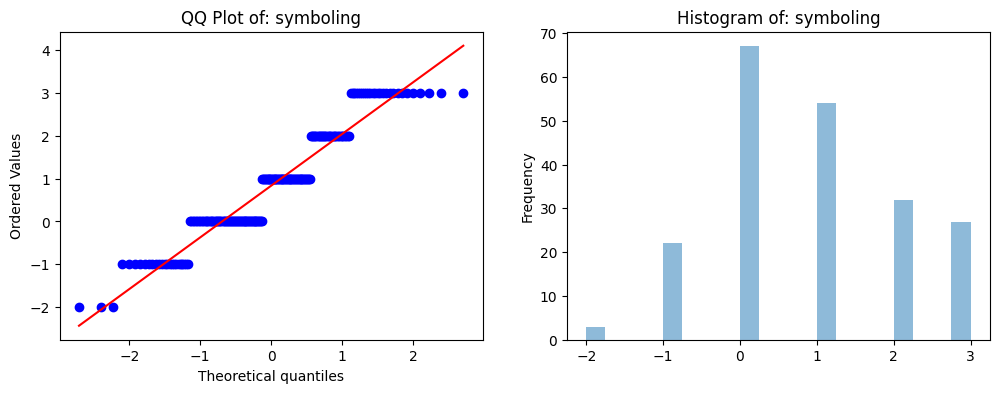

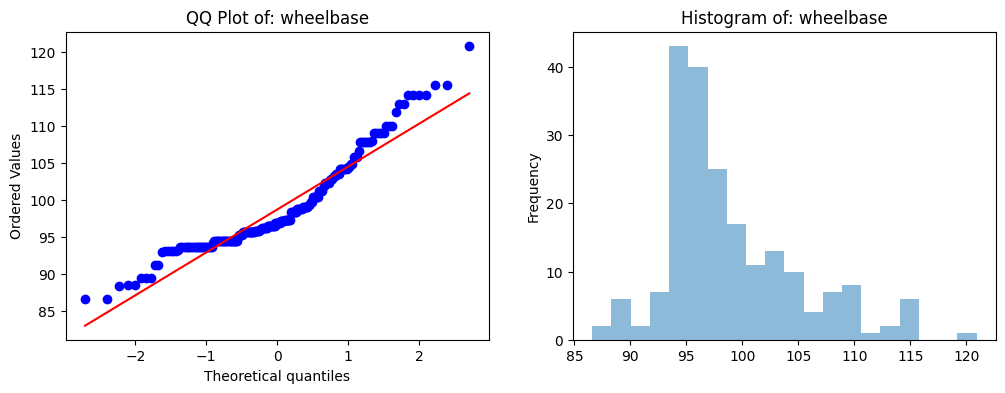

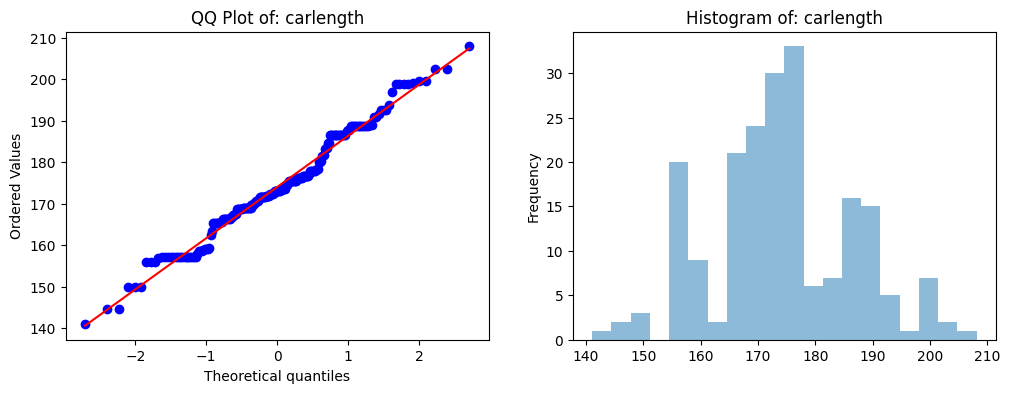

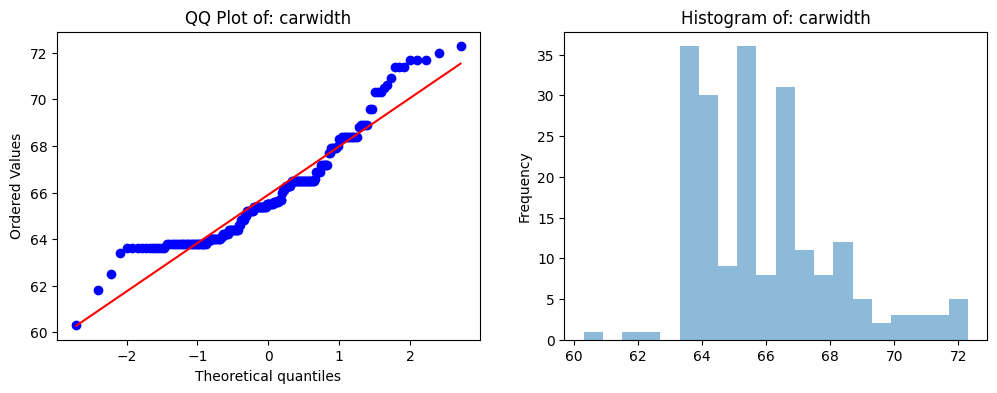

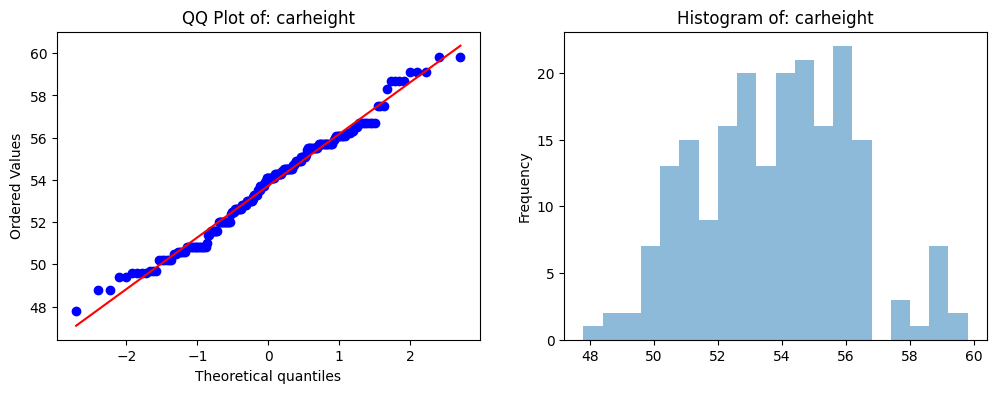

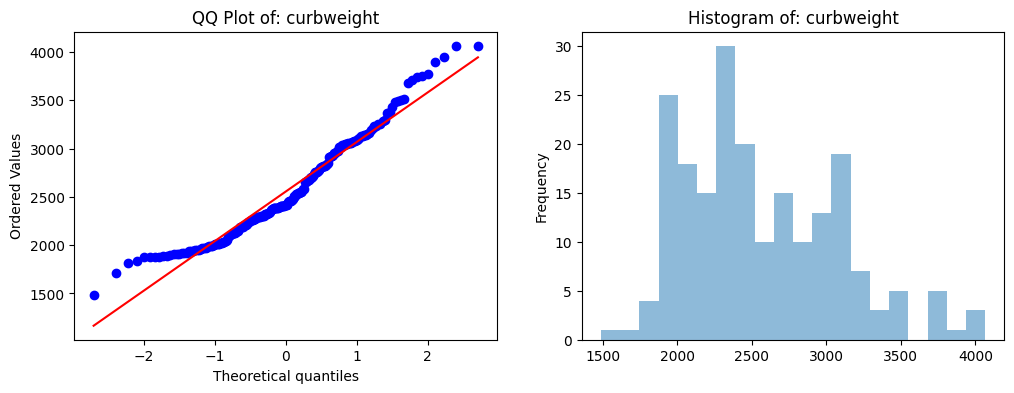

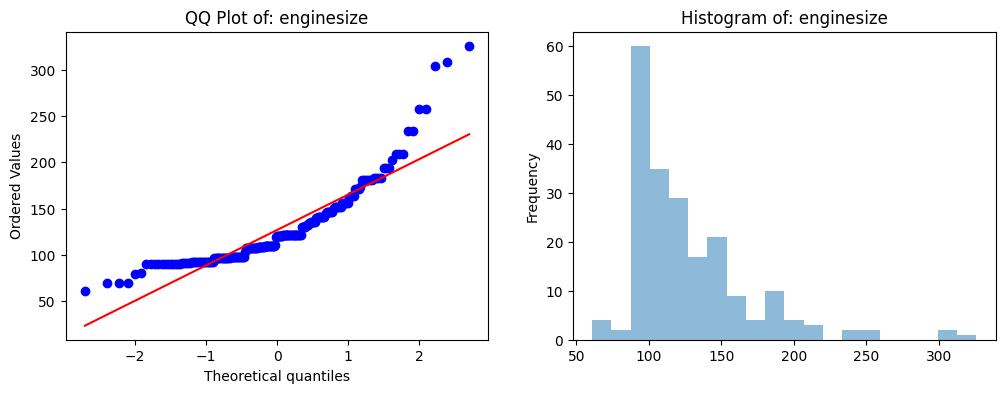

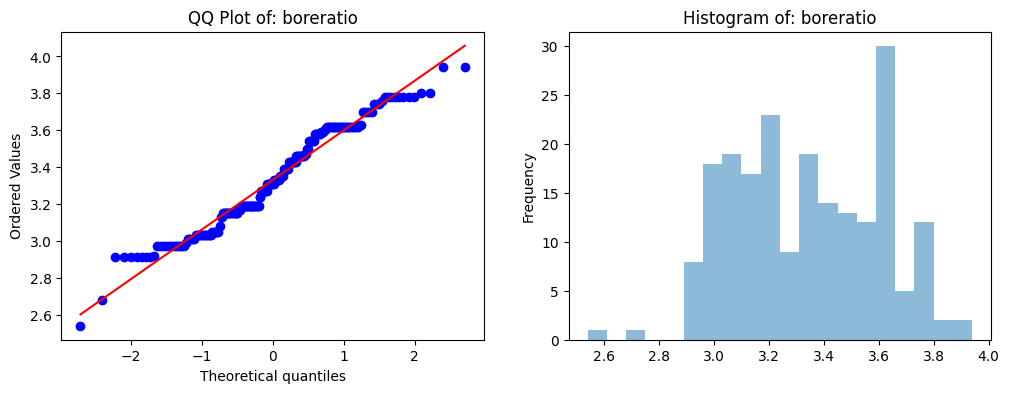

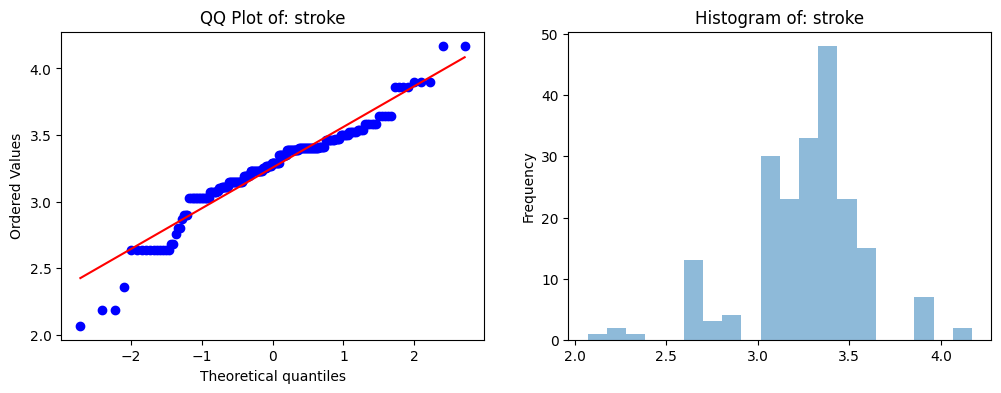

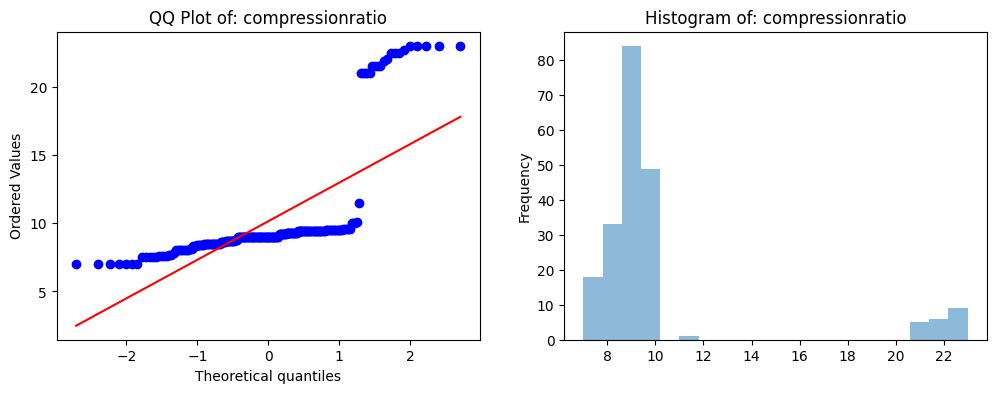

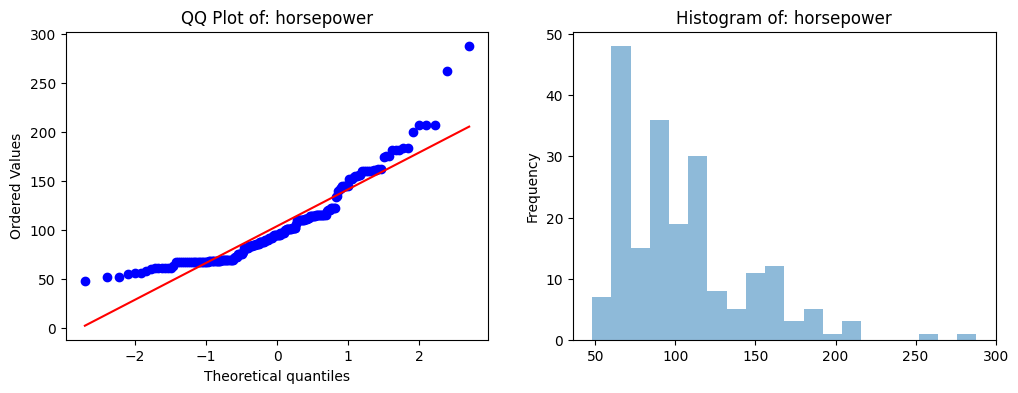

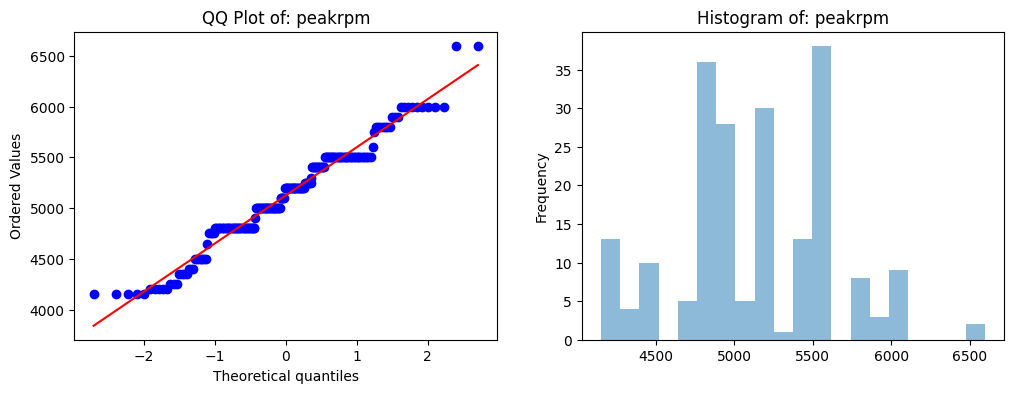

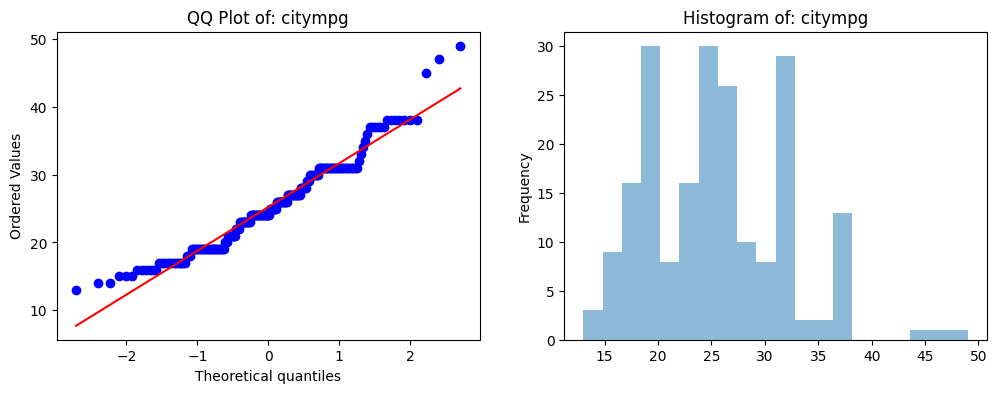

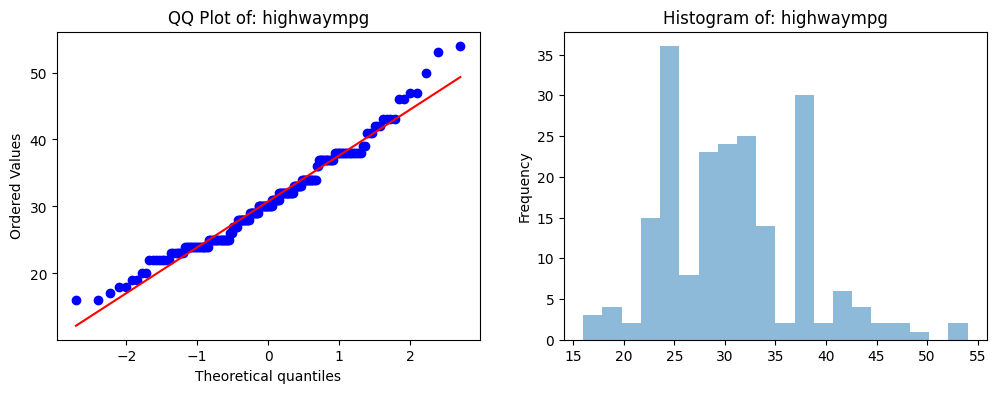

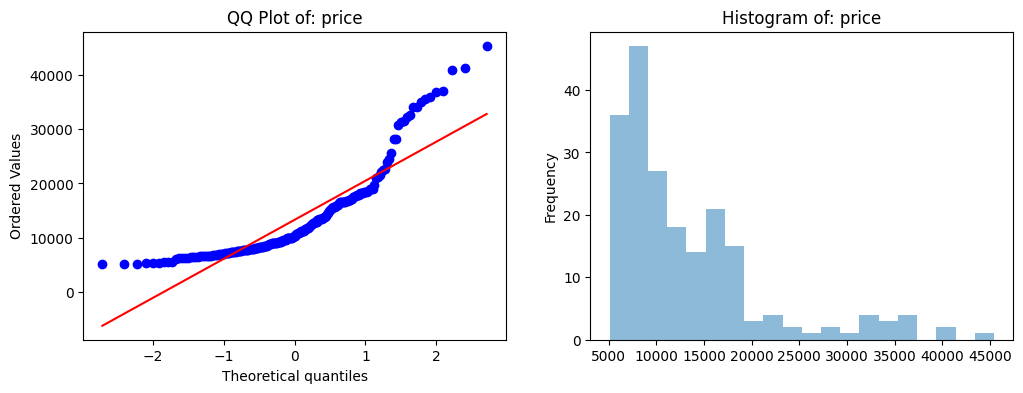

In [13]:
for col in df_col_num:
    # Create subplots for QQ plot and histogram
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))

    # Plot QQ plot
    plt.subplot(121)
    stats.probplot(df[col], dist="norm", plot=axes[0])
    axes[0].set_title('QQ Plot of: {}'.format(col))

    # Plot histogram
    plt.subplot(122)
    df[col].plot(kind='hist', bins=20, alpha=0.5, ax=axes[1])
    axes[1].set_title('Histogram of: {}'.format(col))


### Functions 

In [14]:
##############################################z_score function##############################
def zscore(df):
    out_li = []
    for i in df:
        miu = np.mean(df)
        sigma = np.std(df)
        z = (i - miu) / sigma
        if abs(z)> 3:
            out_li.appendp(i)
        return out_li, len(out_li)
############################################## IQR #########################################

def IQR(df):
    out_iqr = []
    q1 = df.quantile(.25)
    q3 = df.quantile(.75)
    iqr = q3 - q1
    for i in df:
        lower_band = q1 - 1.5*(iqr)
        upper_band = q3 + 1.5*(iqr)
        if i < lower_band or i > upper_band:
            out_iqr.append(i)
    return out_iqr, len(out_iqr)
###################################### Grid_search ################################
from sklearn.model_selection import GridSearchCV
def GrdSrch_Tune(model, X, y, params):
    
    clf = GridSearchCV(model, params, scoring ='neg_mean_squared_error', cv = 5, n_jobs=-1)
    clf.fit(X, y)
    
    print("best score is :" , clf.best_score_)
    print("best estimator is :" , clf.best_estimator_)
    print("best Params is {} :" .format(clf.best_params_))
    
    return (clf.best_score_)


# outliers detection

In [15]:
outlier = []

for c in df_col_num:
    _, len_outlier = IQR(df[c])
    _, len_outlier_z_score = zscore(df[c])
    
    if len_outlier !=0:
        outlier.append(c)
    print("IQR ->", c,": " , len_outlier)
    print("Z-score ->",c,": " , len_outlier_z_score)
    print("*****************")

IQR -> symboling :  0
Z-score -> symboling :  0
*****************
IQR -> wheelbase :  3
Z-score -> wheelbase :  0
*****************
IQR -> carlength :  1
Z-score -> carlength :  0
*****************
IQR -> carwidth :  8
Z-score -> carwidth :  0
*****************
IQR -> carheight :  0
Z-score -> carheight :  0
*****************
IQR -> curbweight :  0
Z-score -> curbweight :  0
*****************
IQR -> enginesize :  10
Z-score -> enginesize :  0
*****************
IQR -> boreratio :  0
Z-score -> boreratio :  0
*****************
IQR -> stroke :  20
Z-score -> stroke :  0
*****************
IQR -> compressionratio :  28
Z-score -> compressionratio :  0
*****************
IQR -> horsepower :  6
Z-score -> horsepower :  0
*****************
IQR -> peakrpm :  2
Z-score -> peakrpm :  0
*****************
IQR -> citympg :  2
Z-score -> citympg :  0
*****************
IQR -> highwaympg :  3
Z-score -> highwaympg :  0
*****************
IQR -> price :  15
Z-score -> price :  0
*****************


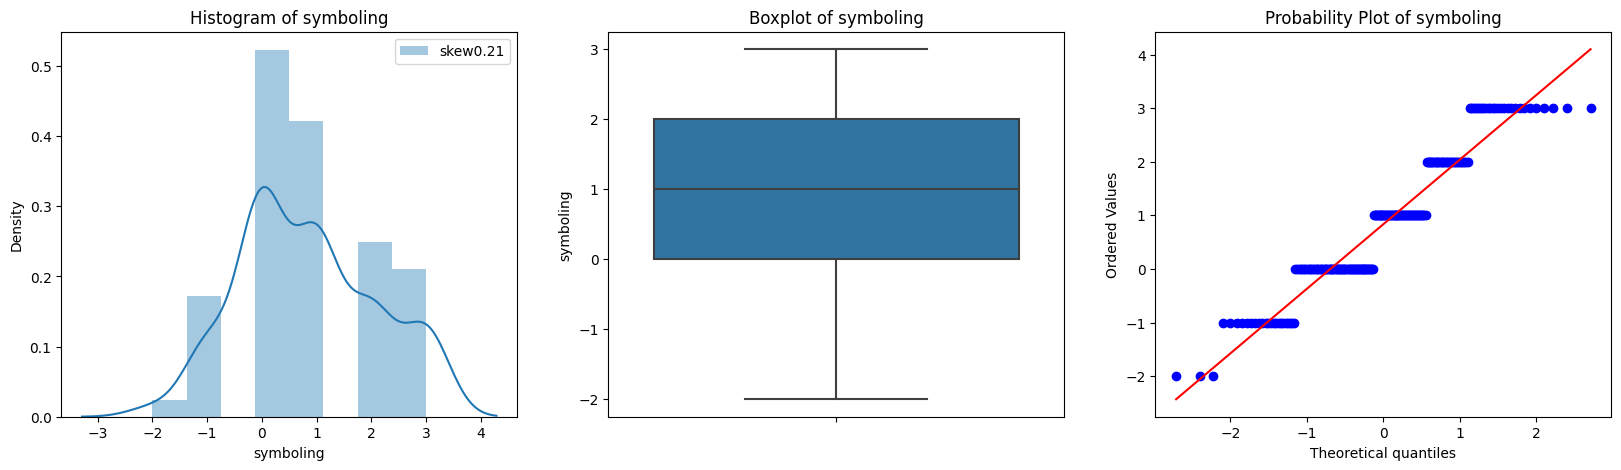

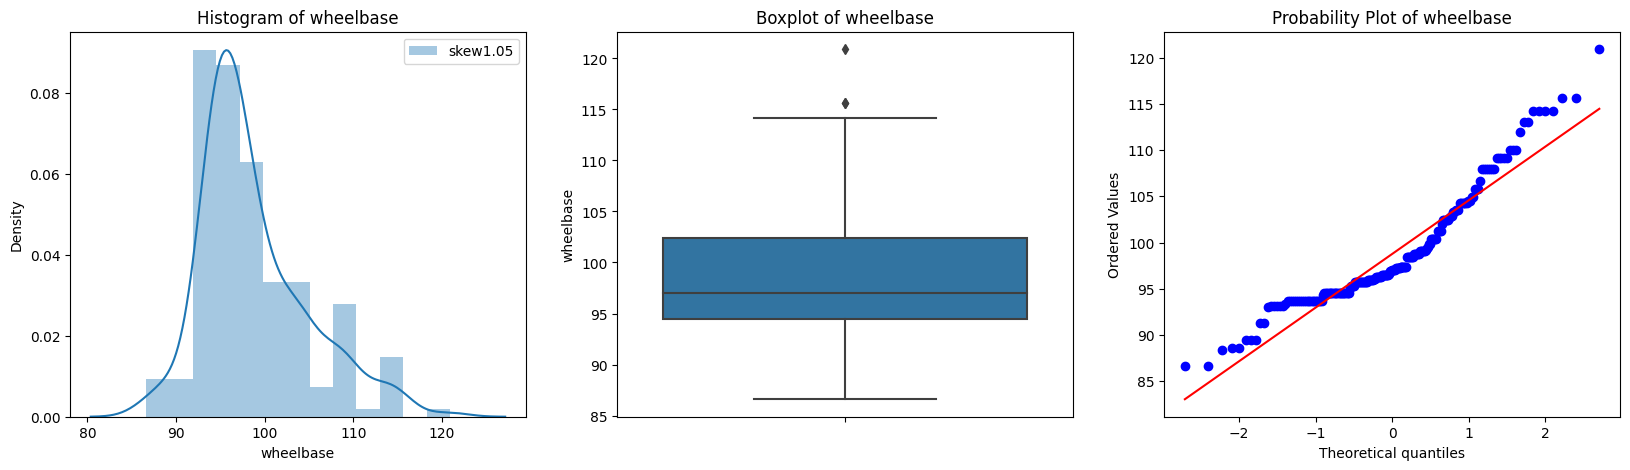

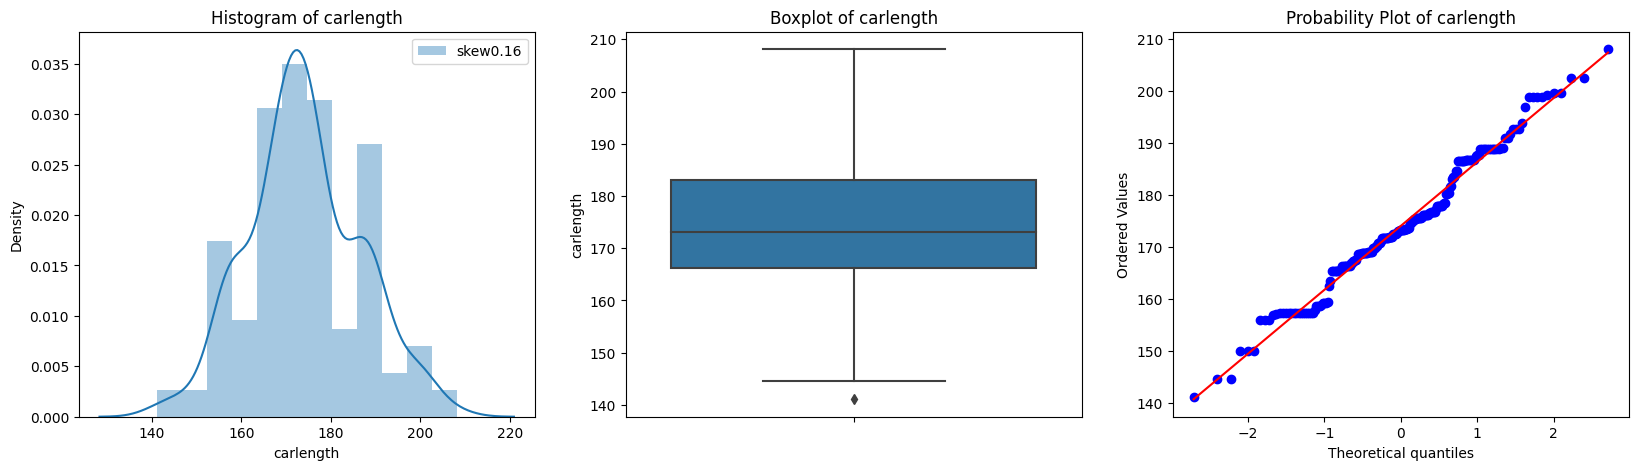

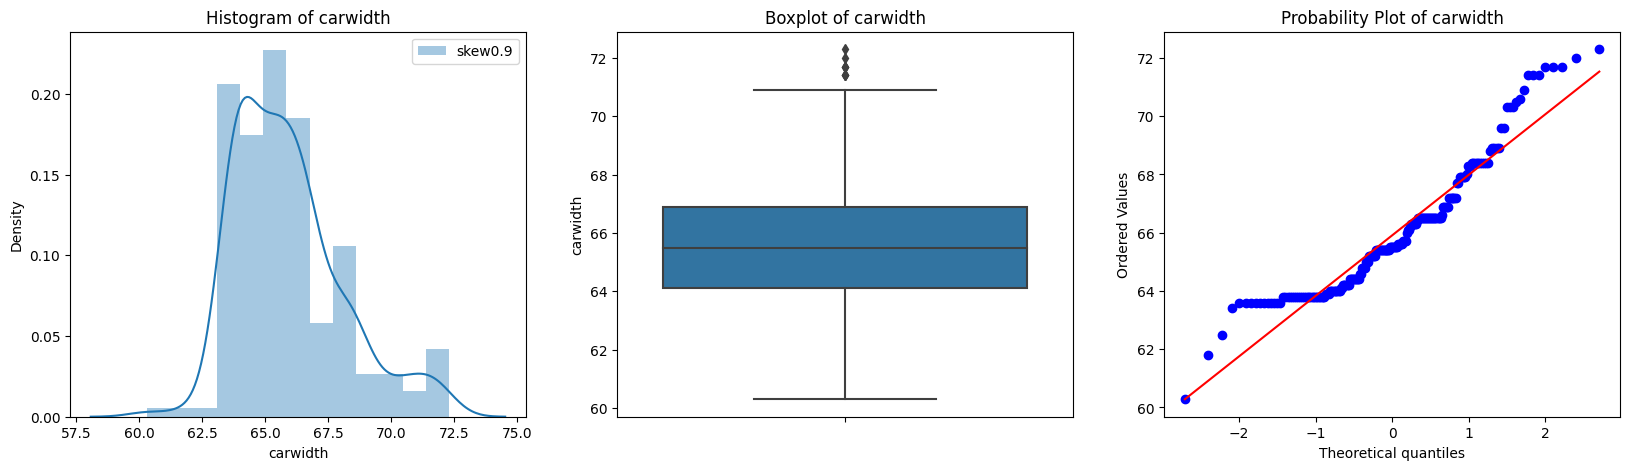

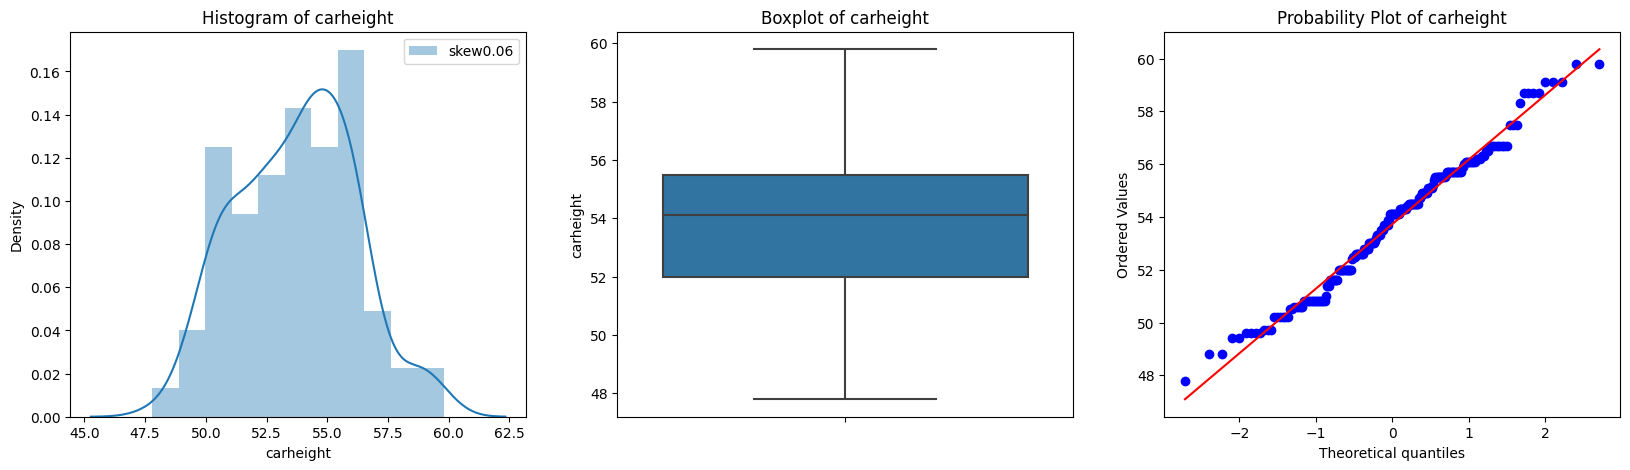

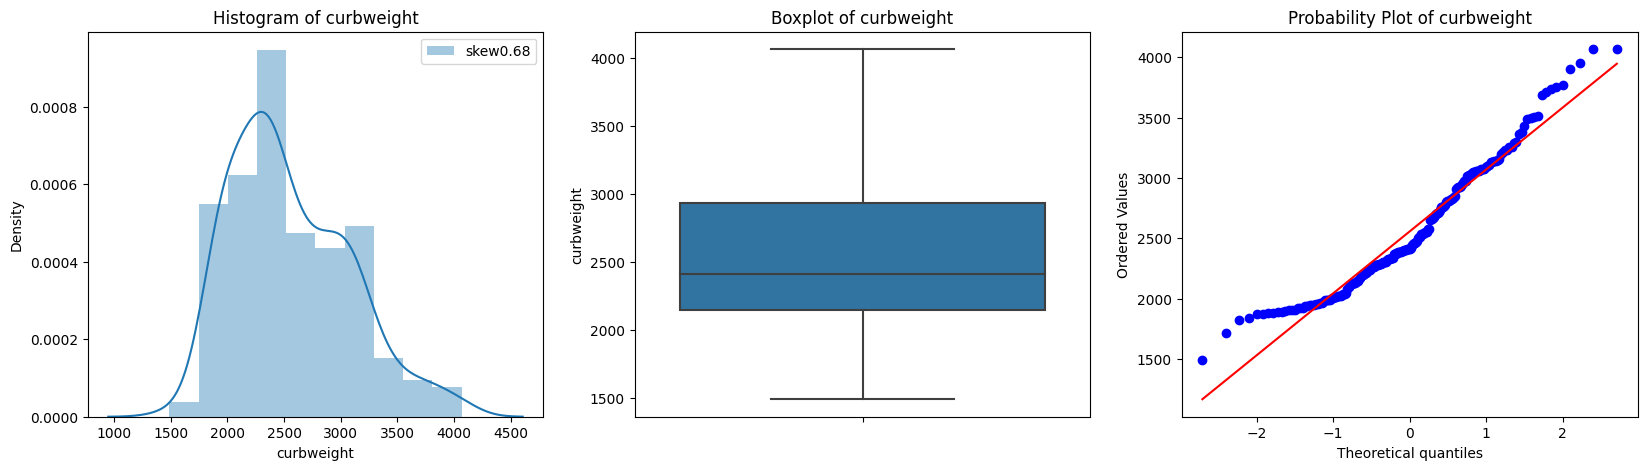

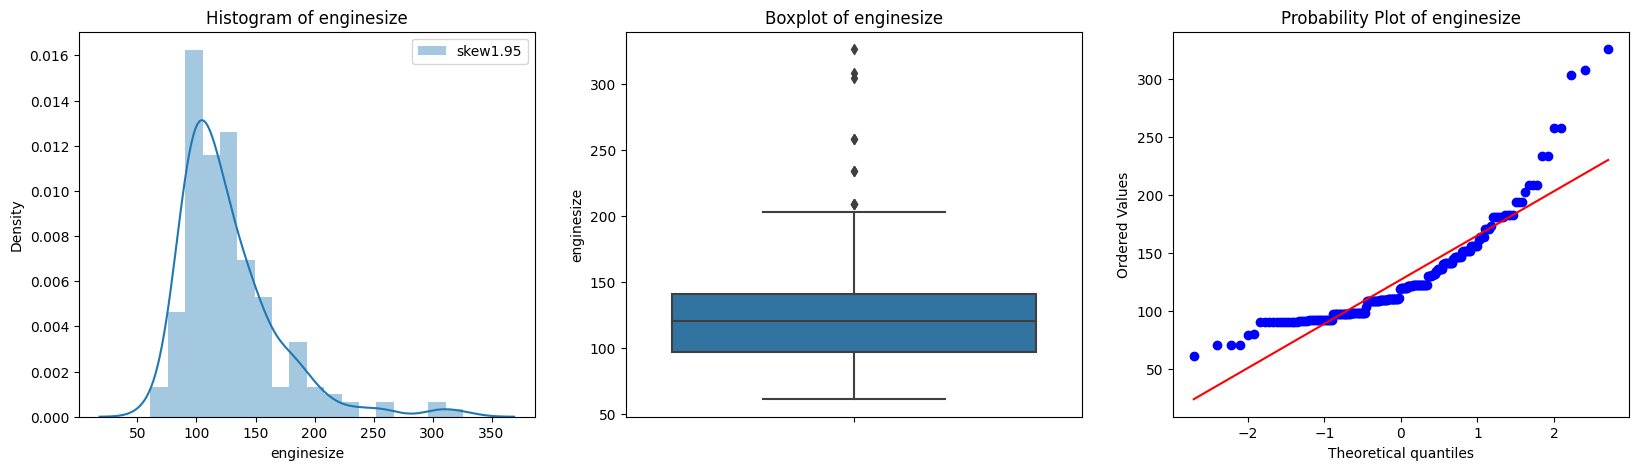

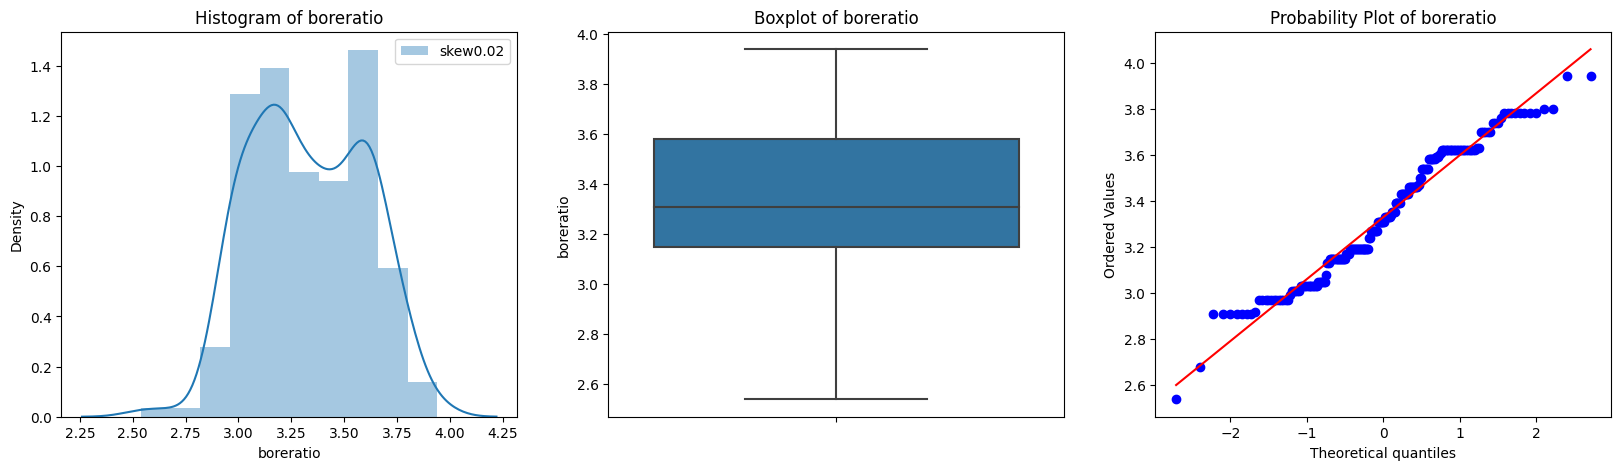

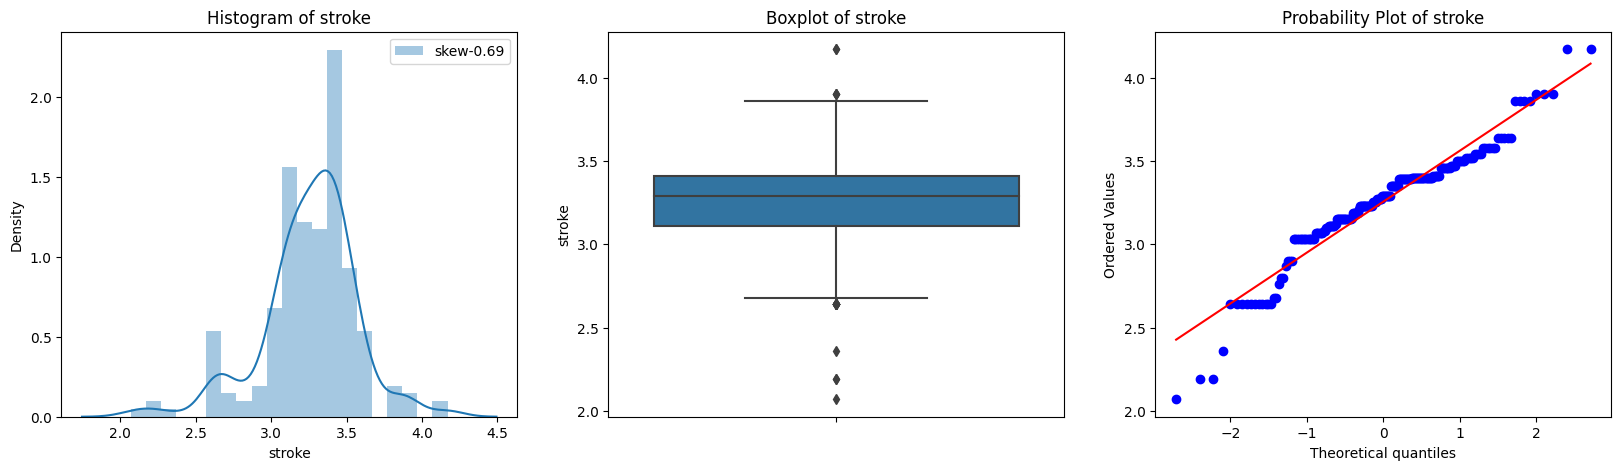

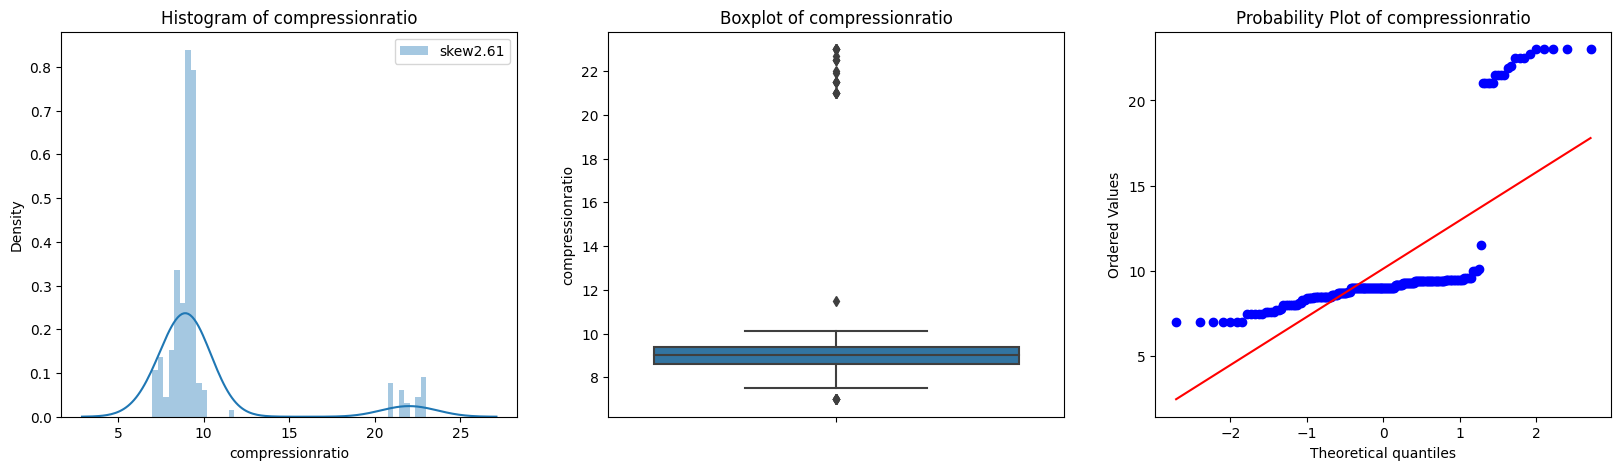

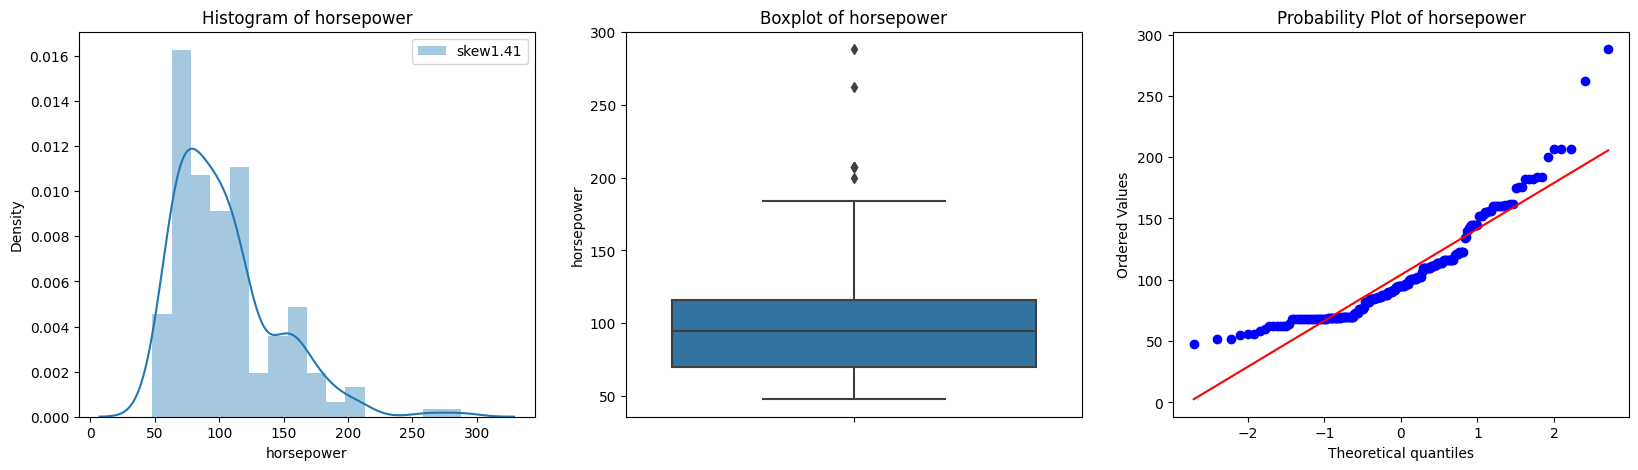

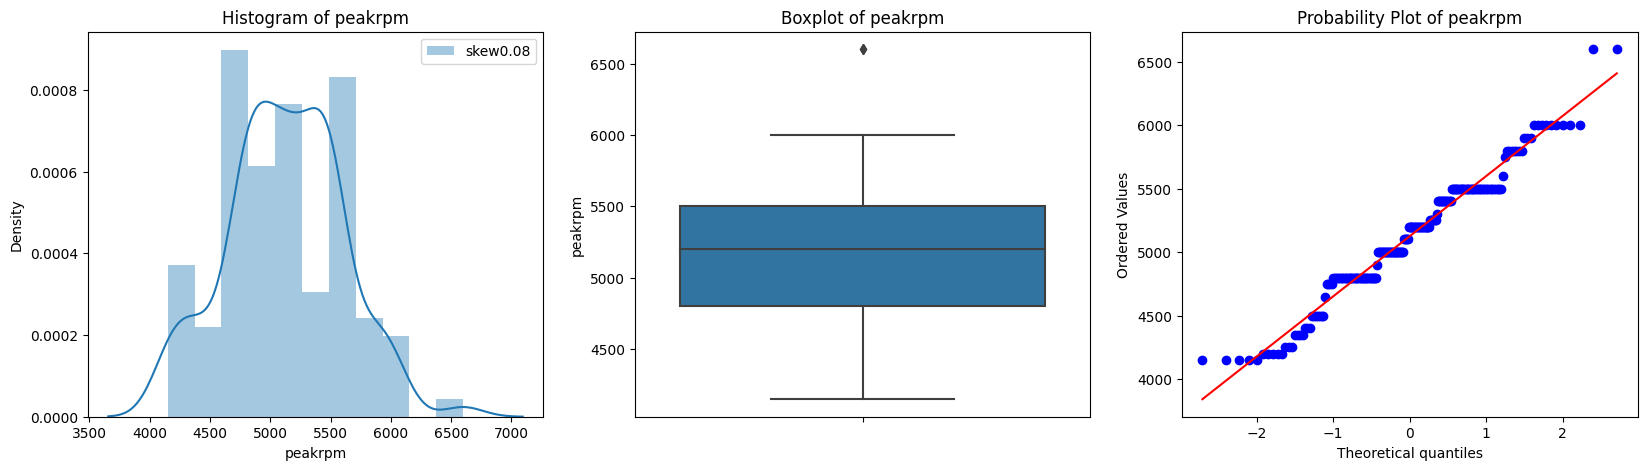

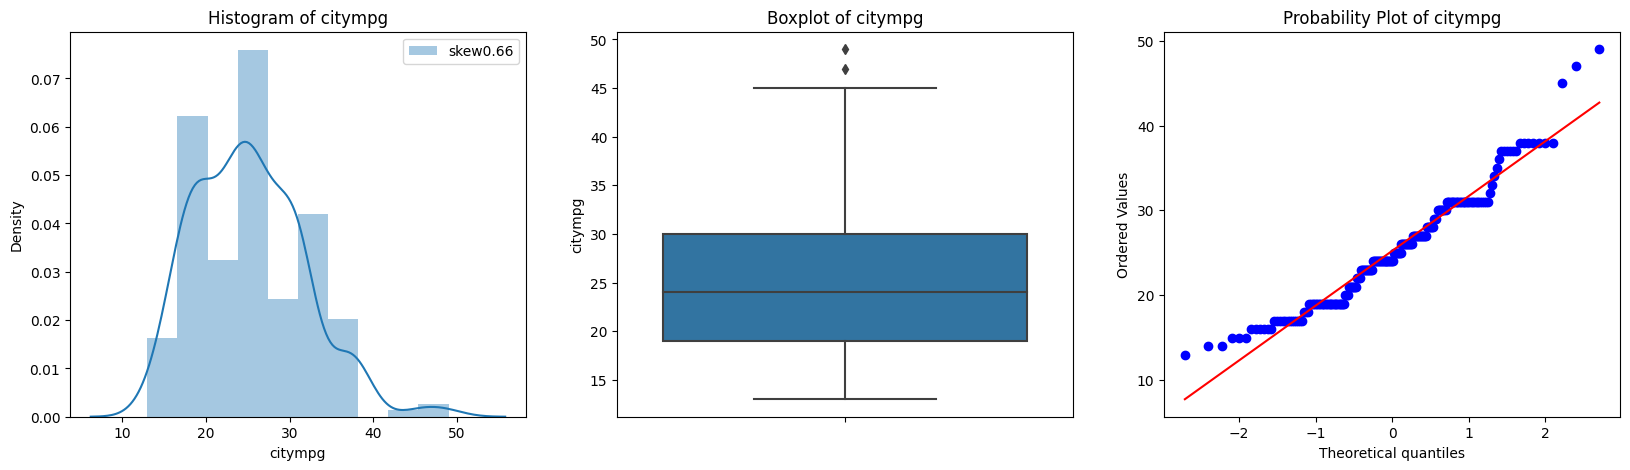

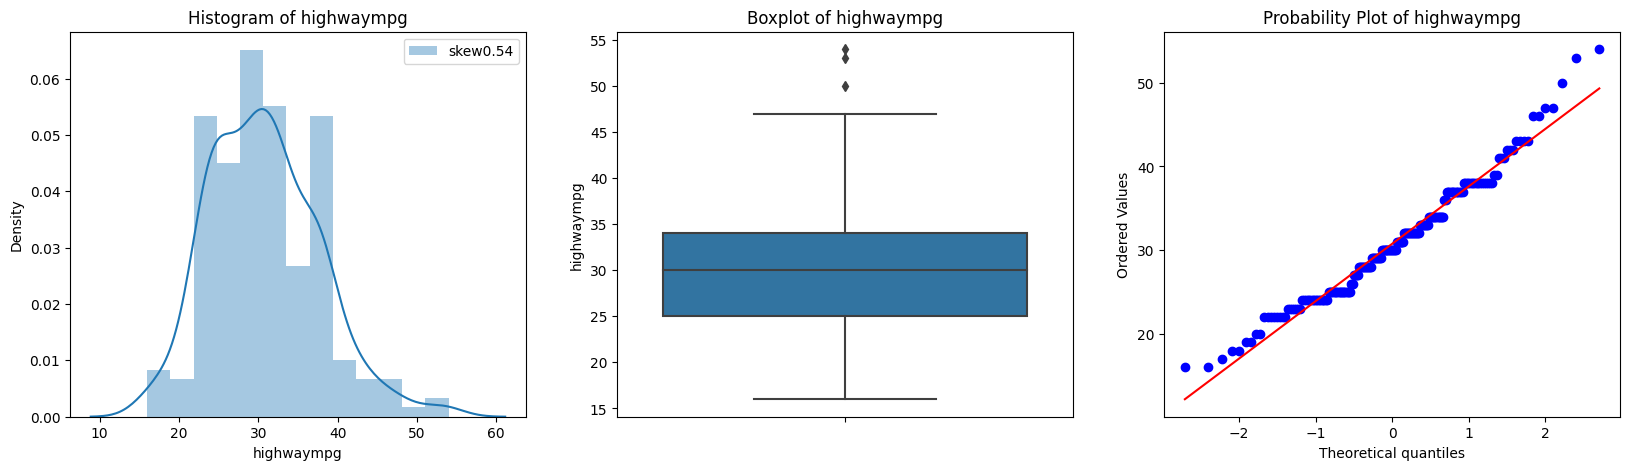

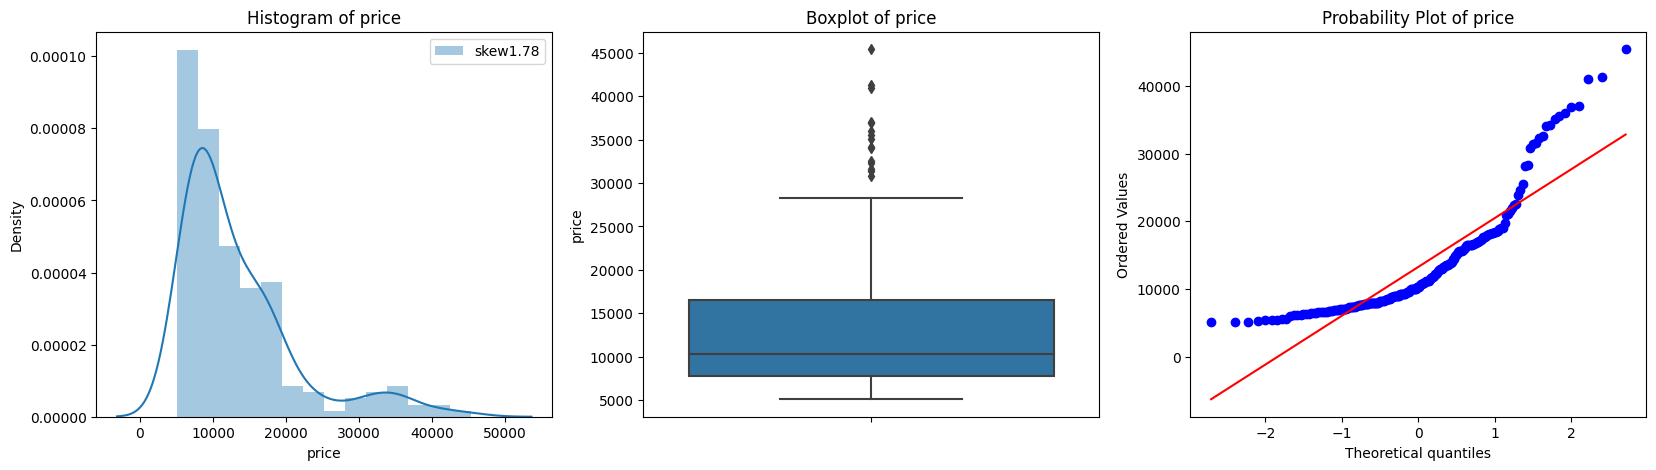

In [16]:
for c in df_col_num:
    plt.figure(figsize=(20,5))

    plt.subplot(131)
    sns.distplot(df[c], label="skew" + str(np.round(df[c].skew(),2)))
    plt.title(f"Histogram of {c}")
    plt.legend()

    
    # Plotting boxplot
    plt.subplot(132)
    sns.boxplot(data=df, y=c)
    plt.title(f"Boxplot of {c}")
    
    # Plotting probability plot
    plt.subplot(133)
    stats.probplot(df[c], dist="norm", plot=plt)
    plt.title(f"Probability Plot of {c}")

# log_transform Independent Numeric Features

# Box Cox
### Box-Cox transformation is a statistical technique that transforms your target variable so that your data closely resembles a normal distribution.

In [17]:
for i in df_col_num:
    df[i] = np.log1p(df[i])
    df_col_num[i] = np.log1p(df[i])
df.head()

symboling                   CarName fueltype aspiration doornumber  \
0   1.386294        alfa-romero giulia      gas        std        two   
1   1.386294       alfa-romero stelvio      gas        std        two   
2   0.693147  alfa-romero Quadrifoglio      gas        std        two   
3   1.098612               audi 100 ls      gas        std       four   
4   1.098612                audi 100ls      gas        std       four   

       carbody drivewheel enginelocation  wheelbase  carlength  ...  \
0  convertible        rwd          front   4.495355   5.134621  ...   
1  convertible        rwd          front   4.495355   5.134621  ...   
2    hatchback        rwd          front   4.559126   5.148657  ...   
3        sedan        fwd          front   4.613138   5.179534  ...   
4        sedan        4wd          front   4.609162   5.179534  ...   

   enginesize  fuelsystem  boreratio    stroke compressionratio  horsepower  \
0    4.875197        mpfi   1.497388  1.302913         2.302585    4.718499   
1    4.875197        mpfi   1.497388  1.302913         2.302585    4.718499   
2    5.030438        mpfi   1.302913  1.497388         2.302585    5.043425   
3    4.700480        mpfi   1.432701  1.481605         2.397895    4.634729   
4    4.919981        mpfi   1.432701  1.481605         2.197225    4.753590   

    peakrpm   citympg  highwaympg     price  
0  8.517393  3.091042    3.332205  9.510149  
1  8.517393  3.091042    3.332205  9.711176  
2  8.517393  2.995732    3.295837  9.711176  
3  8.612685  3.218876    3.433987  9.543306  
4  8.612685  2.944439    3.135494  9.767152  

[5 rows x 25 columns]

## Log-transformation

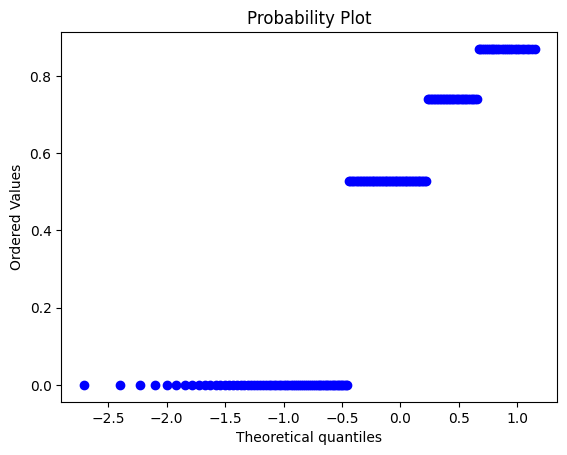

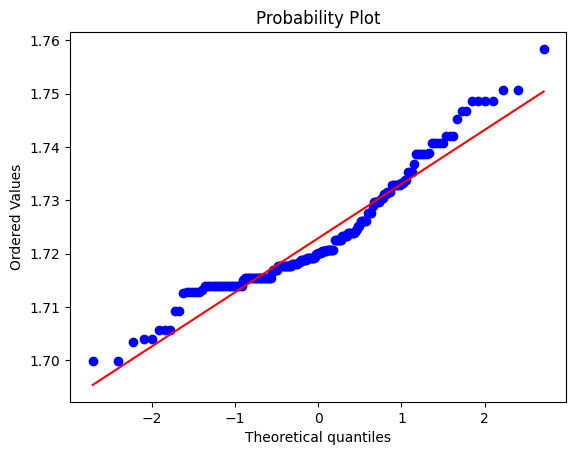

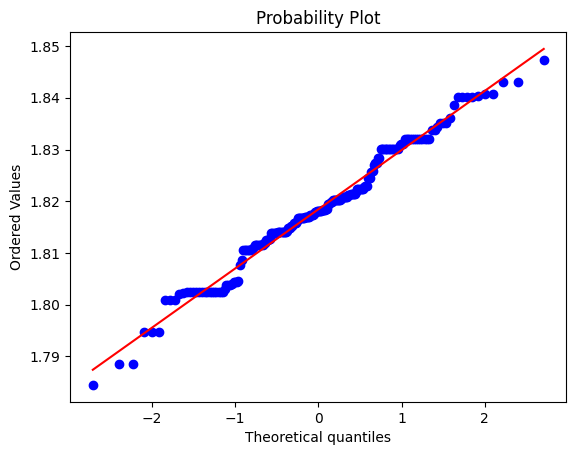

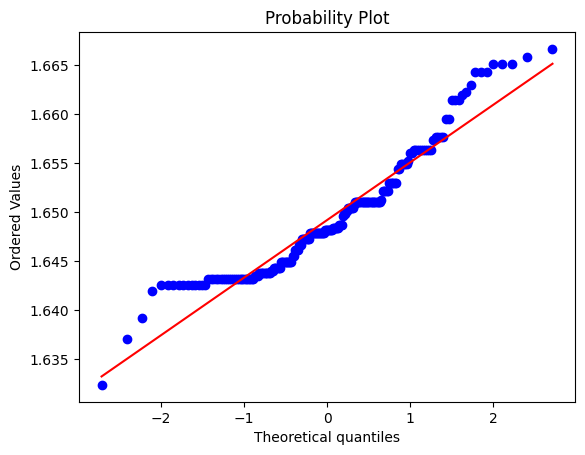

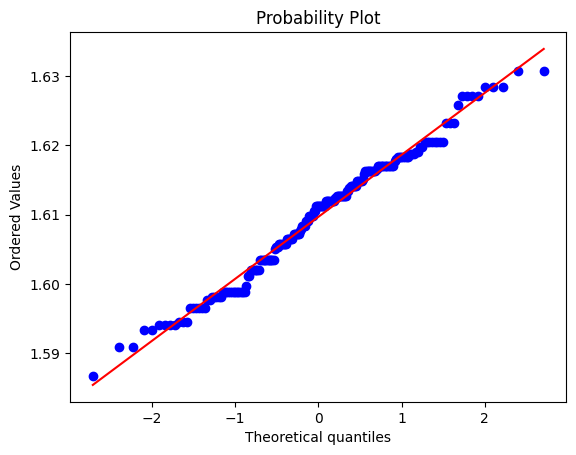

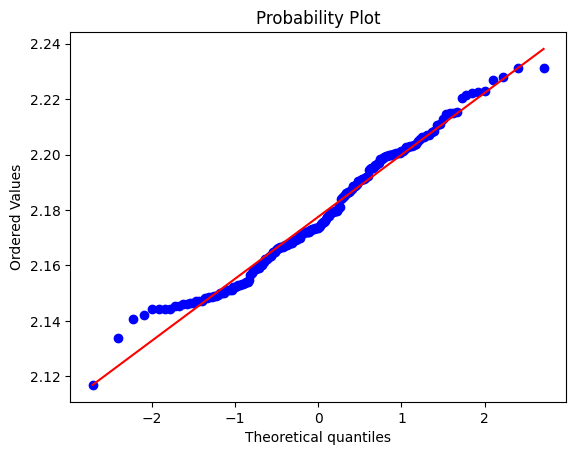

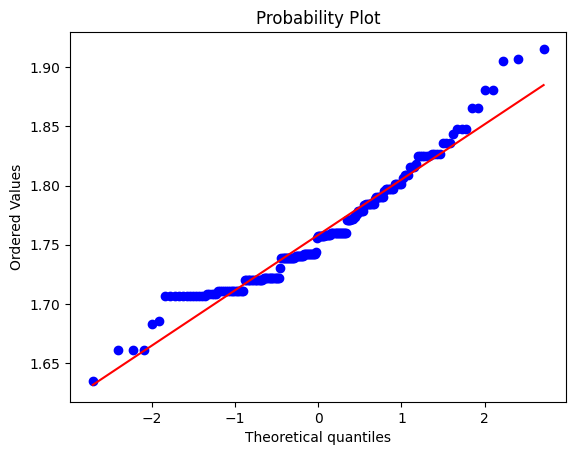

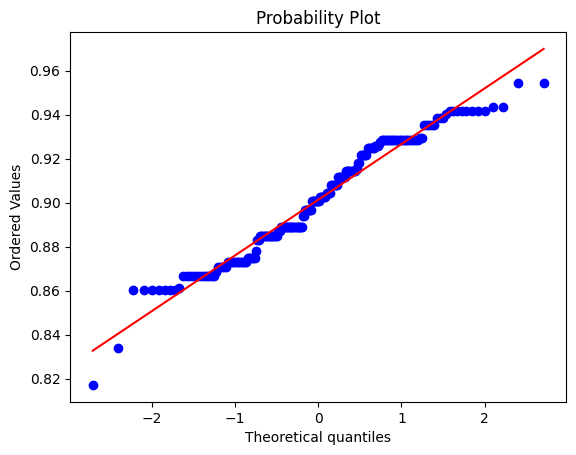

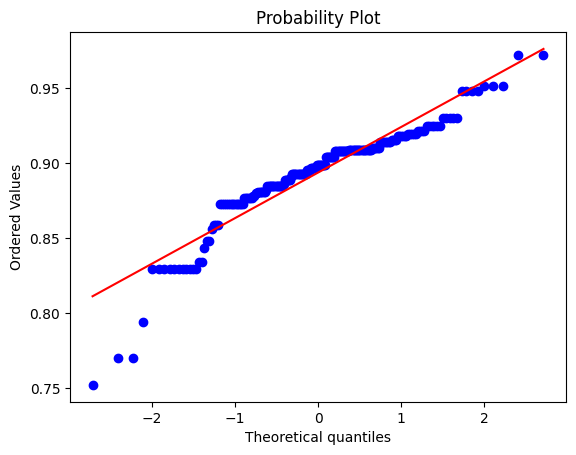

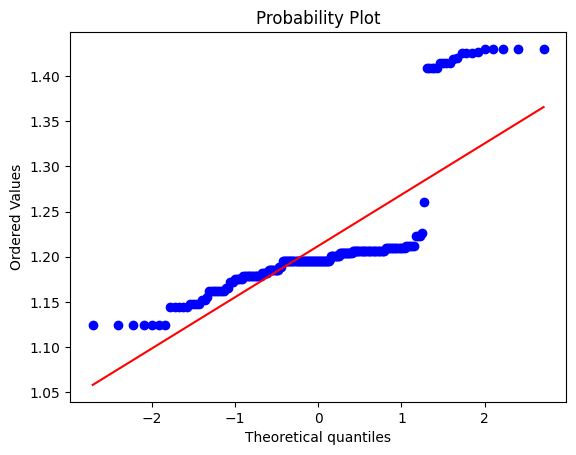

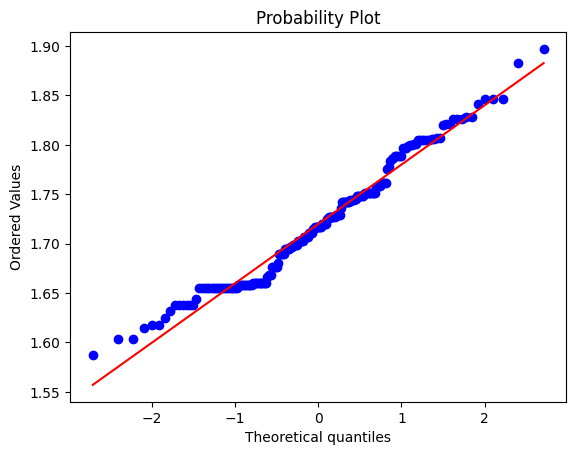

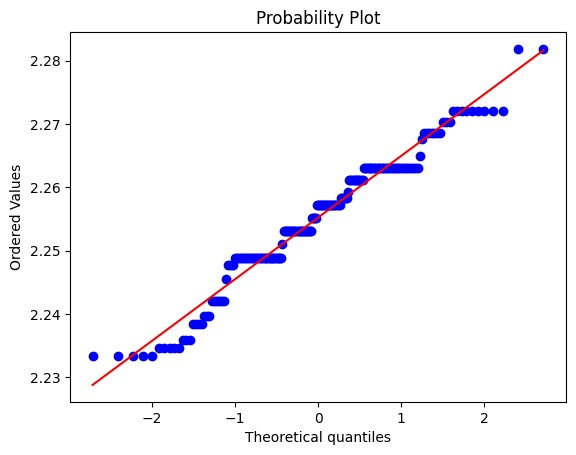

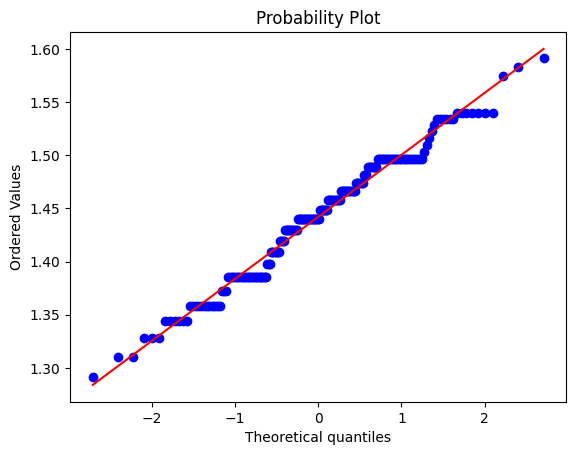

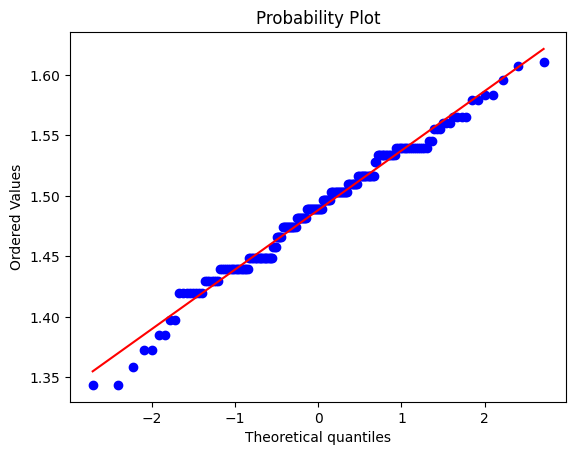

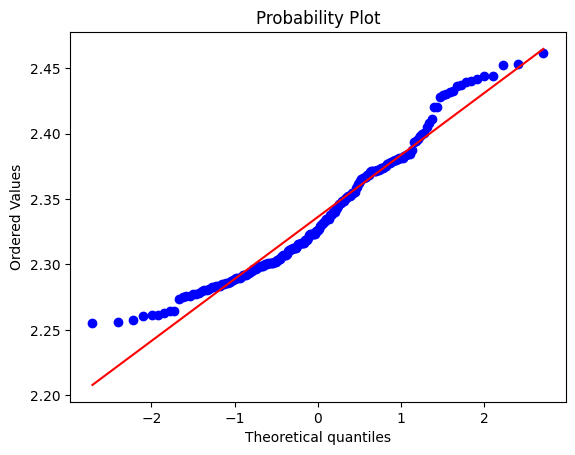

In [18]:
for col in df_col_num:

    #Get also the QQ-plot
    fig = plt.figure()
    plt.title(col)
    res = stats.probplot(df_col_num[col], plot=plt)


# Independent object Features

In [19]:
df_col_obj = df.select_dtypes(include='object')
df_col_obj

CarName fueltype aspiration doornumber      carbody  \
0          alfa-romero giulia      gas        std        two  convertible   
1         alfa-romero stelvio      gas        std        two  convertible   
2    alfa-romero Quadrifoglio      gas        std        two    hatchback   
3                 audi 100 ls      gas        std       four        sedan   
4                  audi 100ls      gas        std       four        sedan   
..                        ...      ...        ...        ...          ...   
200           volvo 145e (sw)      gas        std       four        sedan   
201               volvo 144ea      gas      turbo       four        sedan   
202               volvo 244dl      gas        std       four        sedan   
203                 volvo 246   diesel      turbo       four        sedan   
204               volvo 264gl      gas      turbo       four        sedan   

    drivewheel enginelocation enginetype cylindernumber fuelsystem  
0          rwd          front       dohc           four       mpfi  
1          rwd          front       dohc           four       mpfi  
2          rwd          front       ohcv            six       mpfi  
3          fwd          front        ohc           four       mpfi  
4          4wd          front        ohc           five       mpfi  
..         ...            ...        ...            ...        ...  
200        rwd          front        ohc           four       mpfi  
201        rwd          front        ohc           four       mpfi  
202        rwd          front       ohcv            six       mpfi  
203        rwd          front        ohc            six        idi  
204        rwd          front        ohc           four       mpfi  

[205 rows x 10 columns]

# Encoding

In [20]:
#print(df.groupby('CarName')['price'].mean().T)
print(df.groupby('fueltype')['price'].mean().T,'\n')
print(df.groupby('aspiration')['price'].mean(),'\n')
print(df.groupby('doornumber')['price'].mean(),'\n')
print(df.groupby('carbody')['price'].mean(),'\n')
print(df.groupby('drivewheel')['price'].mean(),'\n')
print(df.groupby('enginelocation')['price'].mean(),'\n')
print(df.groupby('enginetype')['price'].mean(),'\n')
print(df.groupby('cylindernumber')['price'].mean(),'\n')
print(df.groupby('fuelsystem')['price'].mean(),'\n')

fueltype
diesel    9.557499
gas       9.332860
Name: price, dtype: float64 

aspiration
std      9.294063
turbo    9.630444
Name: price, dtype: float64 

doornumber
four    9.393281
two     9.305574
Name: price, dtype: float64 

carbody
convertible    9.890592
hardtop        9.793955
hatchback      9.154820
sedan          9.431547
wagon          9.350718
Name: price, dtype: float64 

drivewheel
4wd    9.262671
fwd    9.078052
rwd    9.802616
Name: price, dtype: float64 

enginelocation
front     9.338538
rear     10.448104
Name: price, dtype: float64 

enginetype
dohc      9.728429
dohcv    10.354611
l         9.546946
ohc       9.243545
ohcf      9.312206
ohcv     10.037122
rotor     9.464912
Name: price, dtype: float64 

cylindernumber
eight     10.520510
five       9.945475
four       9.173863
six       10.007664
three      8.547140
twelve    10.491302
two        9.464912
Name: price, dtype: float64 

fuelsystem
1bbl    8.915167
2bbl    8.903150
4bbl    9.400559
idi     9.557499
mfi

In [21]:
df.columns

Index(['symboling', 'CarName', 'fueltype', 'aspiration', 'doornumber',
       'carbody', 'drivewheel', 'enginelocation', 'wheelbase', 'carlength',
       'carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber',
       'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')

In [22]:
def dummy(df,x):
    temp = pd.get_dummies(df[x], drop_first = True)
    df = pd.concat([df, temp], axis = 1)
    df.drop([x], axis = 1, inplace = True)
    return df

In [23]:
df = dummy(df,'fueltype')
df = dummy(df,'aspiration')
df = dummy(df,'doornumber')
df = dummy(df,'carbody')
df = dummy(df,'drivewheel')
df = dummy(df,'enginelocation')
df = dummy(df,'enginetype')
df = dummy(df,'cylindernumber')
df = dummy(df,'fuelsystem')
df

symboling                   CarName  wheelbase  carlength  carwidth  \
0     1.386294        alfa-romero giulia   4.495355   5.134621  4.175925   
1     1.386294       alfa-romero stelvio   4.495355   5.134621  4.175925   
2     0.693147  alfa-romero Quadrifoglio   4.559126   5.148657  4.197202   
3     1.098612               audi 100 ls   4.613138   5.179534  4.207673   
4     1.098612                audi 100ls   4.609162   5.179534  4.210645   
..         ...                       ...        ...        ...       ...   
200       -inf           volvo 145e (sw)   4.701389   5.245971  4.247066   
201       -inf               volvo 144ea   4.701389   5.245971  4.245634   
202       -inf               volvo 244dl   4.701389   5.245971  4.247066   
203       -inf                 volvo 246   4.701389   5.245971  4.247066   
204       -inf               volvo 264gl   4.701389   5.245971  4.247066   

     carheight  curbweight  enginesize  boreratio    stroke  ...  three  \
0     3.908015    7.843456    4.875197   1.497388  1.302913  ...      0   
1     3.908015    7.843456    4.875197   1.497388  1.302913  ...      0   
2     3.977811    7.945910    5.030438   1.302913  1.497388  ...      0   
3     4.012773    7.757051    4.700480   1.432701  1.481605  ...      0   
4     4.012773    7.946264    4.919981   1.432701  1.481605  ...      0   
..         ...         ...         ...        ...       ...  ...    ...   
200   4.034241    7.990577    4.955827   1.564441  1.423108  ...      0   
201   4.034241    8.022897    4.955827   1.564441  1.423108  ...      0   
202   4.034241    8.010692    5.159055   1.521699  1.353255  ...      0   
203   4.034241    8.076515    4.983607   1.388791  1.481605  ...      0   
204   4.034241    8.027150    4.955827   1.564441  1.423108  ...      0   

     twelve  two  2bbl  4bbl  idi  mfi  mpfi  spdi  spfi  
0         0    0     0     0    0    0     1     0     0  
1         0    0     0     0    0    0     1     0     0  
2         0    0     0     0    0    0     1     0     0  
3         0    0     0     0    0    0     1     0     0  
4         0    0     0     0    0    0     1     0     0  
..      ...  ...   ...   ...  ...  ...   ...   ...   ...  
200       0    0     0     0    0    0     1     0     0  
201       0    0     0     0    0    0     1     0     0  
202       0    0     0     0    0    0     1     0     0  
203       0    0     0     0    1    0     0     0     0  
204       0    0     0     0    0    0     1     0     0  

[205 rows x 45 columns]

In [24]:
df.columns

Index(['symboling', 'CarName', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price', 'gas', 'turbo', 'two', 'hardtop', 'hatchback', 'sedan',
       'wagon', 'fwd', 'rwd', 'rear', 'dohcv', 'l', 'ohc', 'ohcf', 'ohcv',
       'rotor', 'five', 'four', 'six', 'three', 'twelve', 'two', '2bbl',
       '4bbl', 'idi', 'mfi', 'mpfi', 'spdi', 'spfi'],
      dtype='object')

In [25]:
duplicate_columns = df.columns[df.columns.duplicated()]
print(duplicate_columns)
df.drop(df.columns[-8], axis=1,inplace=True)
df.columns

Index(['two'], dtype='object')


Index(['symboling', 'CarName', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price', 'gas', 'turbo', 'hardtop', 'hatchback', 'sedan', 'wagon',
       'fwd', 'rwd', 'rear', 'dohcv', 'l', 'ohc', 'ohcf', 'ohcv', 'rotor',
       'five', 'four', 'six', 'three', 'twelve', '2bbl', '4bbl', 'idi', 'mfi',
       'mpfi', 'spdi', 'spfi'],
      dtype='object')

# Data Format

In [26]:
car_name_company = df['CarName'].apply(lambda x: x.split(' ')[0])
car_name_company

0      alfa-romero
1      alfa-romero
2      alfa-romero
3             audi
4             audi
          ...     
200          volvo
201          volvo
202          volvo
203          volvo
204          volvo
Name: CarName, Length: 205, dtype: object

In [27]:
car_name_company.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [28]:
df.insert(0,"CompanyName",car_name_company)


In [29]:
df.head()

CompanyName  symboling                   CarName  wheelbase  carlength  \
0  alfa-romero   1.386294        alfa-romero giulia   4.495355   5.134621   
1  alfa-romero   1.386294       alfa-romero stelvio   4.495355   5.134621   
2  alfa-romero   0.693147  alfa-romero Quadrifoglio   4.559126   5.148657   
3         audi   1.098612               audi 100 ls   4.613138   5.179534   
4         audi   1.098612                audi 100ls   4.609162   5.179534   

   carwidth  carheight  curbweight  enginesize  boreratio  ...  six  three  \
0  4.175925   3.908015    7.843456    4.875197   1.497388  ...    0      0   
1  4.175925   3.908015    7.843456    4.875197   1.497388  ...    0      0   
2  4.197202   3.977811    7.945910    5.030438   1.302913  ...    1      0   
3  4.207673   4.012773    7.757051    4.700480   1.432701  ...    0      0   
4  4.210645   4.012773    7.946264    4.919981   1.432701  ...    0      0   

   twelve  2bbl  4bbl  idi  mfi  mpfi  spdi  spfi  
0       0     0     0    0    0     1     0     0  
1       0     0     0    0    0     1     0     0  
2       0     0     0    0    0     1     0     0  
3       0     0     0    0    0     1     0     0  
4       0     0     0    0    0     1     0     0  

[5 rows x 44 columns]

In [30]:
df['CompanyName'] = df['CompanyName'] .str.lower()  # For Nissan

df['CompanyName'] = df['CompanyName'] .replace('maxda','mazda')
df['CompanyName'] = df['CompanyName'] .replace('porcshce','porsche')
df['CompanyName'] = df['CompanyName'] .replace('toyouta','toyota')
df['CompanyName'] = df['CompanyName'] .replace('vokswagen','volkswagen')
df['CompanyName'] = df['CompanyName'] .replace('vw','volkswagen')


In [31]:
df['CompanyName'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

# Train Test Split

In [32]:
df_train , df_test = train_test_split(df,test_size=0.3,random_state=42 )

# Car Name Encoding with Catboost Encode!

In [33]:
#pip install catboost

In [34]:
import category_encoders as ce
#from catboost import CatBoostRegressor

# Initialize the CatBoostEncoder
catboost_encoder = ce.CatBoostEncoder()

# Fit the encoder on the features and transform the categorical column
df_train['CompanyName_encoded'] = catboost_encoder.fit_transform(df_train['CompanyName'],df_train['price'])

# Print the transformed dataset
df_train['CompanyName_encoded']=round(df_train['CompanyName_encoded'],2)

df_train['CompanyName_encoded']

177    9.37
75     9.37
174    9.35
31     9.37
12     9.37
       ... 
106    9.17
14     9.87
92     9.25
179    9.17
102    9.20
Name: CompanyName_encoded, Length: 143, dtype: float64

In [35]:
df_test['CompanyName_encoded'] = catboost_encoder.transform(df_test['CompanyName'],df_test['price'])
df_test['CompanyName_encoded']=round(df_test['CompanyName_encoded'],2)

df_test['CompanyName_encoded'] 

15     9.37
9      9.37
100    9.37
132    9.37
68     9.37
       ... 
56     9.47
128    9.37
76     9.27
144    9.15
104    9.08
Name: CompanyName_encoded, Length: 62, dtype: float64

In [36]:
df_train.columns

Index(['CompanyName', 'symboling', 'CarName', 'wheelbase', 'carlength',
       'carwidth', 'carheight', 'curbweight', 'enginesize', 'boreratio',
       'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg',
       'highwaympg', 'price', 'gas', 'turbo', 'hardtop', 'hatchback', 'sedan',
       'wagon', 'fwd', 'rwd', 'rear', 'dohcv', 'l', 'ohc', 'ohcf', 'ohcv',
       'rotor', 'five', 'four', 'six', 'three', 'twelve', '2bbl', '4bbl',
       'idi', 'mfi', 'mpfi', 'spdi', 'spfi', 'CompanyName_encoded'],
      dtype='object')

## Remove 2 Redundant string columns

In [37]:
df_train.drop(['CarName','CompanyName'],axis=1,inplace=True)
df_test.drop(['CarName','CompanyName'],axis=1,inplace=True)
df.drop(['CarName','CompanyName'],axis=1,inplace=True)

In [38]:
df = round(df,2)
df_train = round(df_train,2)
df_test = round(df_test,2)
df_train

symboling  wheelbase  carlength  carwidth  carheight  curbweight  \
177       -inf       4.64       5.17      4.21       4.01        7.81   
75        0.69       4.64       5.19      4.23       4.02        7.98   
174       -inf       4.64       5.17      4.21       4.02        7.82   
31        1.10       4.47       4.98      4.17       3.95        7.51   
12        0.00       4.63       5.18      4.19       4.01        7.91   
..         ...        ...        ...       ...        ...         ...   
106       0.69       4.61       5.19      4.23       3.93        8.05   
14        0.69       4.65       5.25      4.22       4.04        8.02   
92        0.69       4.56       5.11      4.17       4.02        7.57   
179       1.39       4.64       5.22      4.23       3.97        8.01   
102       0.00       4.62       5.22      4.21       4.04        8.10   

     enginesize  boreratio  stroke  compressionratio  ...  three  twelve  \
177        4.81       1.46    1.51              2.27  ...      0       0   
75         4.95       1.56    1.42              2.20  ...      0       0   
174        4.71       1.45    1.47              3.16  ...      0       0   
31         4.53       1.36    1.48              2.32  ...      0       0   
12         5.11       1.46    1.43              2.30  ...      0       0   
..          ...        ...     ...               ...  ...    ...     ...   
106        5.20       1.49    1.45              2.30  ...      0       0   
14         5.11       1.46    1.43              2.30  ...      0       0   
92         4.58       1.42    1.46              2.34  ...      0       0   
179        5.15       1.45    1.47              2.33  ...      0       0   
102        5.20       1.49    1.45              2.30  ...      0       0   

     2bbl  4bbl  idi  mfi  mpfi  spdi  spfi  CompanyName_encoded  
177     0     0    0    0     1     0     0                 9.37  
75      0     0    0    0     1     0     0                 9.37  
174     0     0    1    0     0     0     0                 9.35  
31      0     0    0    0     0     0     0                 9.37  
12      0     0    0    0     1     0     0                 9.37  
..    ...   ...  ...  ...   ...   ...   ...                  ...  
106     0     0    0    0     1     0     0                 9.17  
14      0     0    0    0     1     0     0                 9.87  
92      1     0    0    0     0     0     0                 9.25  
179     0     0    0    0     1     0     0                 9.17  
102     0     0    0    0     1     0     0                 9.20  

[143 rows x 43 columns]

In [39]:
# Find infinite values
inf_mask = np.isinf(df).sum()

# Print DataFrame with True where values are infinite, False otherwise
print(inf_mask)

symboling           22
wheelbase            0
carlength            0
carwidth             0
carheight            0
curbweight           0
enginesize           0
boreratio            0
stroke               0
compressionratio     0
horsepower           0
peakrpm              0
citympg              0
highwaympg           0
price                0
gas                  0
turbo                0
hardtop              0
hatchback            0
sedan                0
wagon                0
fwd                  0
rwd                  0
rear                 0
dohcv                0
l                    0
ohc                  0
ohcf                 0
ohcv                 0
rotor                0
five                 0
four                 0
six                  0
three                0
twelve               0
2bbl                 0
4bbl                 0
idi                  0
mfi                  0
mpfi                 0
spdi                 0
spfi                 0
dtype: int64


In [40]:
df.replace([np.inf, -np.inf], 0, inplace=True)
df_train.replace([np.inf, -np.inf], 0, inplace=True)
df_test.replace([np.inf, -np.inf], 0, inplace=True)

In [41]:
df_train

symboling  wheelbase  carlength  carwidth  carheight  curbweight  \
177       0.00       4.64       5.17      4.21       4.01        7.81   
75        0.69       4.64       5.19      4.23       4.02        7.98   
174       0.00       4.64       5.17      4.21       4.02        7.82   
31        1.10       4.47       4.98      4.17       3.95        7.51   
12        0.00       4.63       5.18      4.19       4.01        7.91   
..         ...        ...        ...       ...        ...         ...   
106       0.69       4.61       5.19      4.23       3.93        8.05   
14        0.69       4.65       5.25      4.22       4.04        8.02   
92        0.69       4.56       5.11      4.17       4.02        7.57   
179       1.39       4.64       5.22      4.23       3.97        8.01   
102       0.00       4.62       5.22      4.21       4.04        8.10   

     enginesize  boreratio  stroke  compressionratio  ...  three  twelve  \
177        4.81       1.46    1.51              2.27  ...      0       0   
75         4.95       1.56    1.42              2.20  ...      0       0   
174        4.71       1.45    1.47              3.16  ...      0       0   
31         4.53       1.36    1.48              2.32  ...      0       0   
12         5.11       1.46    1.43              2.30  ...      0       0   
..          ...        ...     ...               ...  ...    ...     ...   
106        5.20       1.49    1.45              2.30  ...      0       0   
14         5.11       1.46    1.43              2.30  ...      0       0   
92         4.58       1.42    1.46              2.34  ...      0       0   
179        5.15       1.45    1.47              2.33  ...      0       0   
102        5.20       1.49    1.45              2.30  ...      0       0   

     2bbl  4bbl  idi  mfi  mpfi  spdi  spfi  CompanyName_encoded  
177     0     0    0    0     1     0     0                 9.37  
75      0     0    0    0     1     0     0                 9.37  
174     0     0    1    0     0     0     0                 9.35  
31      0     0    0    0     0     0     0                 9.37  
12      0     0    0    0     1     0     0                 9.37  
..    ...   ...  ...  ...   ...   ...   ...                  ...  
106     0     0    0    0     1     0     0                 9.17  
14      0     0    0    0     1     0     0                 9.87  
92      1     0    0    0     0     0     0                 9.25  
179     0     0    0    0     1     0     0                 9.17  
102     0     0    0    0     1     0     0                 9.20  

[143 rows x 43 columns]

In [42]:
df.isnull().sum()

symboling           3
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginesize          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
gas                 0
turbo               0
hardtop             0
hatchback           0
sedan               0
wagon               0
fwd                 0
rwd                 0
rear                0
dohcv               0
l                   0
ohc                 0
ohcf                0
ohcv                0
rotor               0
five                0
four                0
six                 0
three               0
twelve              0
2bbl                0
4bbl                0
idi                 0
mfi                 0
mpfi                0
spdi                0
spfi                0
dtype: int64

In [43]:
df.fillna(0, inplace=True)
df_train.fillna(0, inplace=True)
df_test.fillna(0, inplace=True)

# StandardScaler 

In [44]:
scaler = StandardScaler()

col_num_list= ['symboling','wheelbase','carlength','carwidth','carheight','curbweight','enginesize',          
'boreratio','stroke','compressionratio','horsepower','peakrpm','citympg','CompanyName_encoded']

df_train[col_num_list] = scaler.fit_transform(df_train[col_num_list])

## Please only Transform the Train data NOT fit it!!!
df_test[col_num_list] = scaler.transform(df_test[col_num_list])

In [45]:
x_train = df_train.drop('price', axis=1)
y_train = df_train['price']

x_test = df_test.drop('price', axis=1)
y_test = df_test['price']

In [46]:
df_train.columns

Index(['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price', 'gas',
       'turbo', 'hardtop', 'hatchback', 'sedan', 'wagon', 'fwd', 'rwd', 'rear',
       'dohcv', 'l', 'ohc', 'ohcf', 'ohcv', 'rotor', 'five', 'four', 'six',
       'three', 'twelve', '2bbl', '4bbl', 'idi', 'mfi', 'mpfi', 'spdi', 'spfi',
       'CompanyName_encoded'],
      dtype='object')

In [47]:
df_test.head(20)

symboling  wheelbase  carlength  carwidth  carheight  curbweight  \
15   -1.053791   0.787312   1.182438  0.497061   0.821566    1.259051   
9    -1.053791   0.114154   0.337699  0.807453  -0.727187    0.952593   
100  -1.053791  -0.222424  -0.084671 -0.434114   0.379065   -0.477546   
132   1.610782   0.114154   0.900859  0.186669   0.821566    0.288599   
68   -1.053791   1.797048   1.323228  2.049020   1.927818    2.025197   
95    0.268911  -0.727292  -0.647830 -1.054898  -0.284686   -1.090463   
159  -1.053791  -0.559003  -0.647830 -0.744506  -0.284686   -0.528623   
162  -1.053791  -0.559003  -0.647830 -0.744506  -0.284686   -0.835081   
147  -1.053791  -0.390714  -0.084671 -0.123723  -0.284686   -0.120012   
182   1.054864  -0.222424  -0.225461 -0.123723   0.821566   -0.579699   
191  -1.053791   0.282444   0.478489  0.497061   0.600316    0.288599   
164   0.268911  -0.727292  -0.507041 -1.054898  -0.505936   -0.681852   
65   -1.053791   0.955601   0.056119  0.186669   0.157815    0.288599   
175  -1.053791   0.619022   0.056119  0.186669   0.157815   -0.222164   
73   -1.053791   3.311652   2.449548  2.669803   1.264067    2.229502   
152   0.268911  -0.559003  -1.351780 -1.054898   0.379065   -1.141540   
18    1.054864  -1.905318  -2.900469 -2.606856  -0.284686   -2.673831   
82    1.610782  -0.559003  -0.084671  0.186669  -1.390938    0.595058   
86    0.268911  -0.390714  -0.084671 -0.123723  -0.948437   -0.222164   
143  -1.053791  -0.222424  -0.225461 -0.123723  -0.505936   -0.375394   

     enginesize  boreratio    stroke  compressionratio  ...  three  twelve  \
15     1.980623   1.088924  0.468417         -0.640384  ...      0       0   
9      0.252720  -0.641255  0.468417         -1.127701  ...      0       0   
100   -0.041392   0.145190  0.734753         -0.437335  ...      0       0   
132   -0.041392   0.774346 -0.596929         -0.112458  ...      0       0   
68     1.465929   0.931635  1.134258          3.055100  ...      0       0   
95    -0.850197  -0.641255  0.202080         -0.071848  ...      0       0   
159   -0.372267  -0.169388  0.335249          3.258149  ...      0       0   
162   -0.776670  -0.483966 -0.730097         -0.234287  ...      0       0   
147   -0.445794   1.088924 -2.061780         -0.234287  ...      0       0   
182   -0.850197  -1.113122  0.468417          3.339368  ...      0       0   
191    0.399775  -0.483966  0.468417         -0.437335  ...      0       0   
164   -0.776670  -0.483966 -0.730097         -0.234287  ...      0       0   
65     0.510067   1.560791 -0.197424         -0.640384  ...      0       0   
175   -0.004628  -0.012099  0.867922         -0.356116  ...      0       0   
73     3.377652   1.718080  0.335249         -0.640384  ...      0       0   
152   -1.034017  -0.955833 -0.730097         -0.234287  ...      0       0   
18    -2.504573  -1.584989 -0.730097         -0.031238  ...      1       0   
82     0.914470   0.931635  1.800099         -1.127701  ...      0       0   
86    -0.004628   0.145190  0.734753         -0.437335  ...      0       0   
143   -0.445794   1.088924 -2.061780         -0.234287  ...      0       0   

     2bbl  4bbl  idi  mfi  mpfi  spdi  spfi  CompanyName_encoded  
15      0     0    0    0     1     0     0             0.144694  
9       0     0    0    0     1     0     0             0.144694  
100     1     0    0    0     0     0     0             0.144694  
132     0     0    0    0     1     0     0             0.144694  
68      0     0    1    0     0     0     0             0.144694  
95      1     0    0    0     0     0     0            -0.222173  
159     0     0    1    0     0     0     0             0.144694  
162     1     0    0    0     0     0     0            -0.625726  
147     0     0    0    0     1     0     0             0.144694  
182     0     0    1    0     0     0     0             0.144694  
191     0     0    0    0     1     0     0            -0.625726  
164     1     0    0    0   

In [48]:
#pip install dataprep

# Feature Engineering

### 1) corrolation  2)wrapper Method 3) Tree-based Embedded Methods

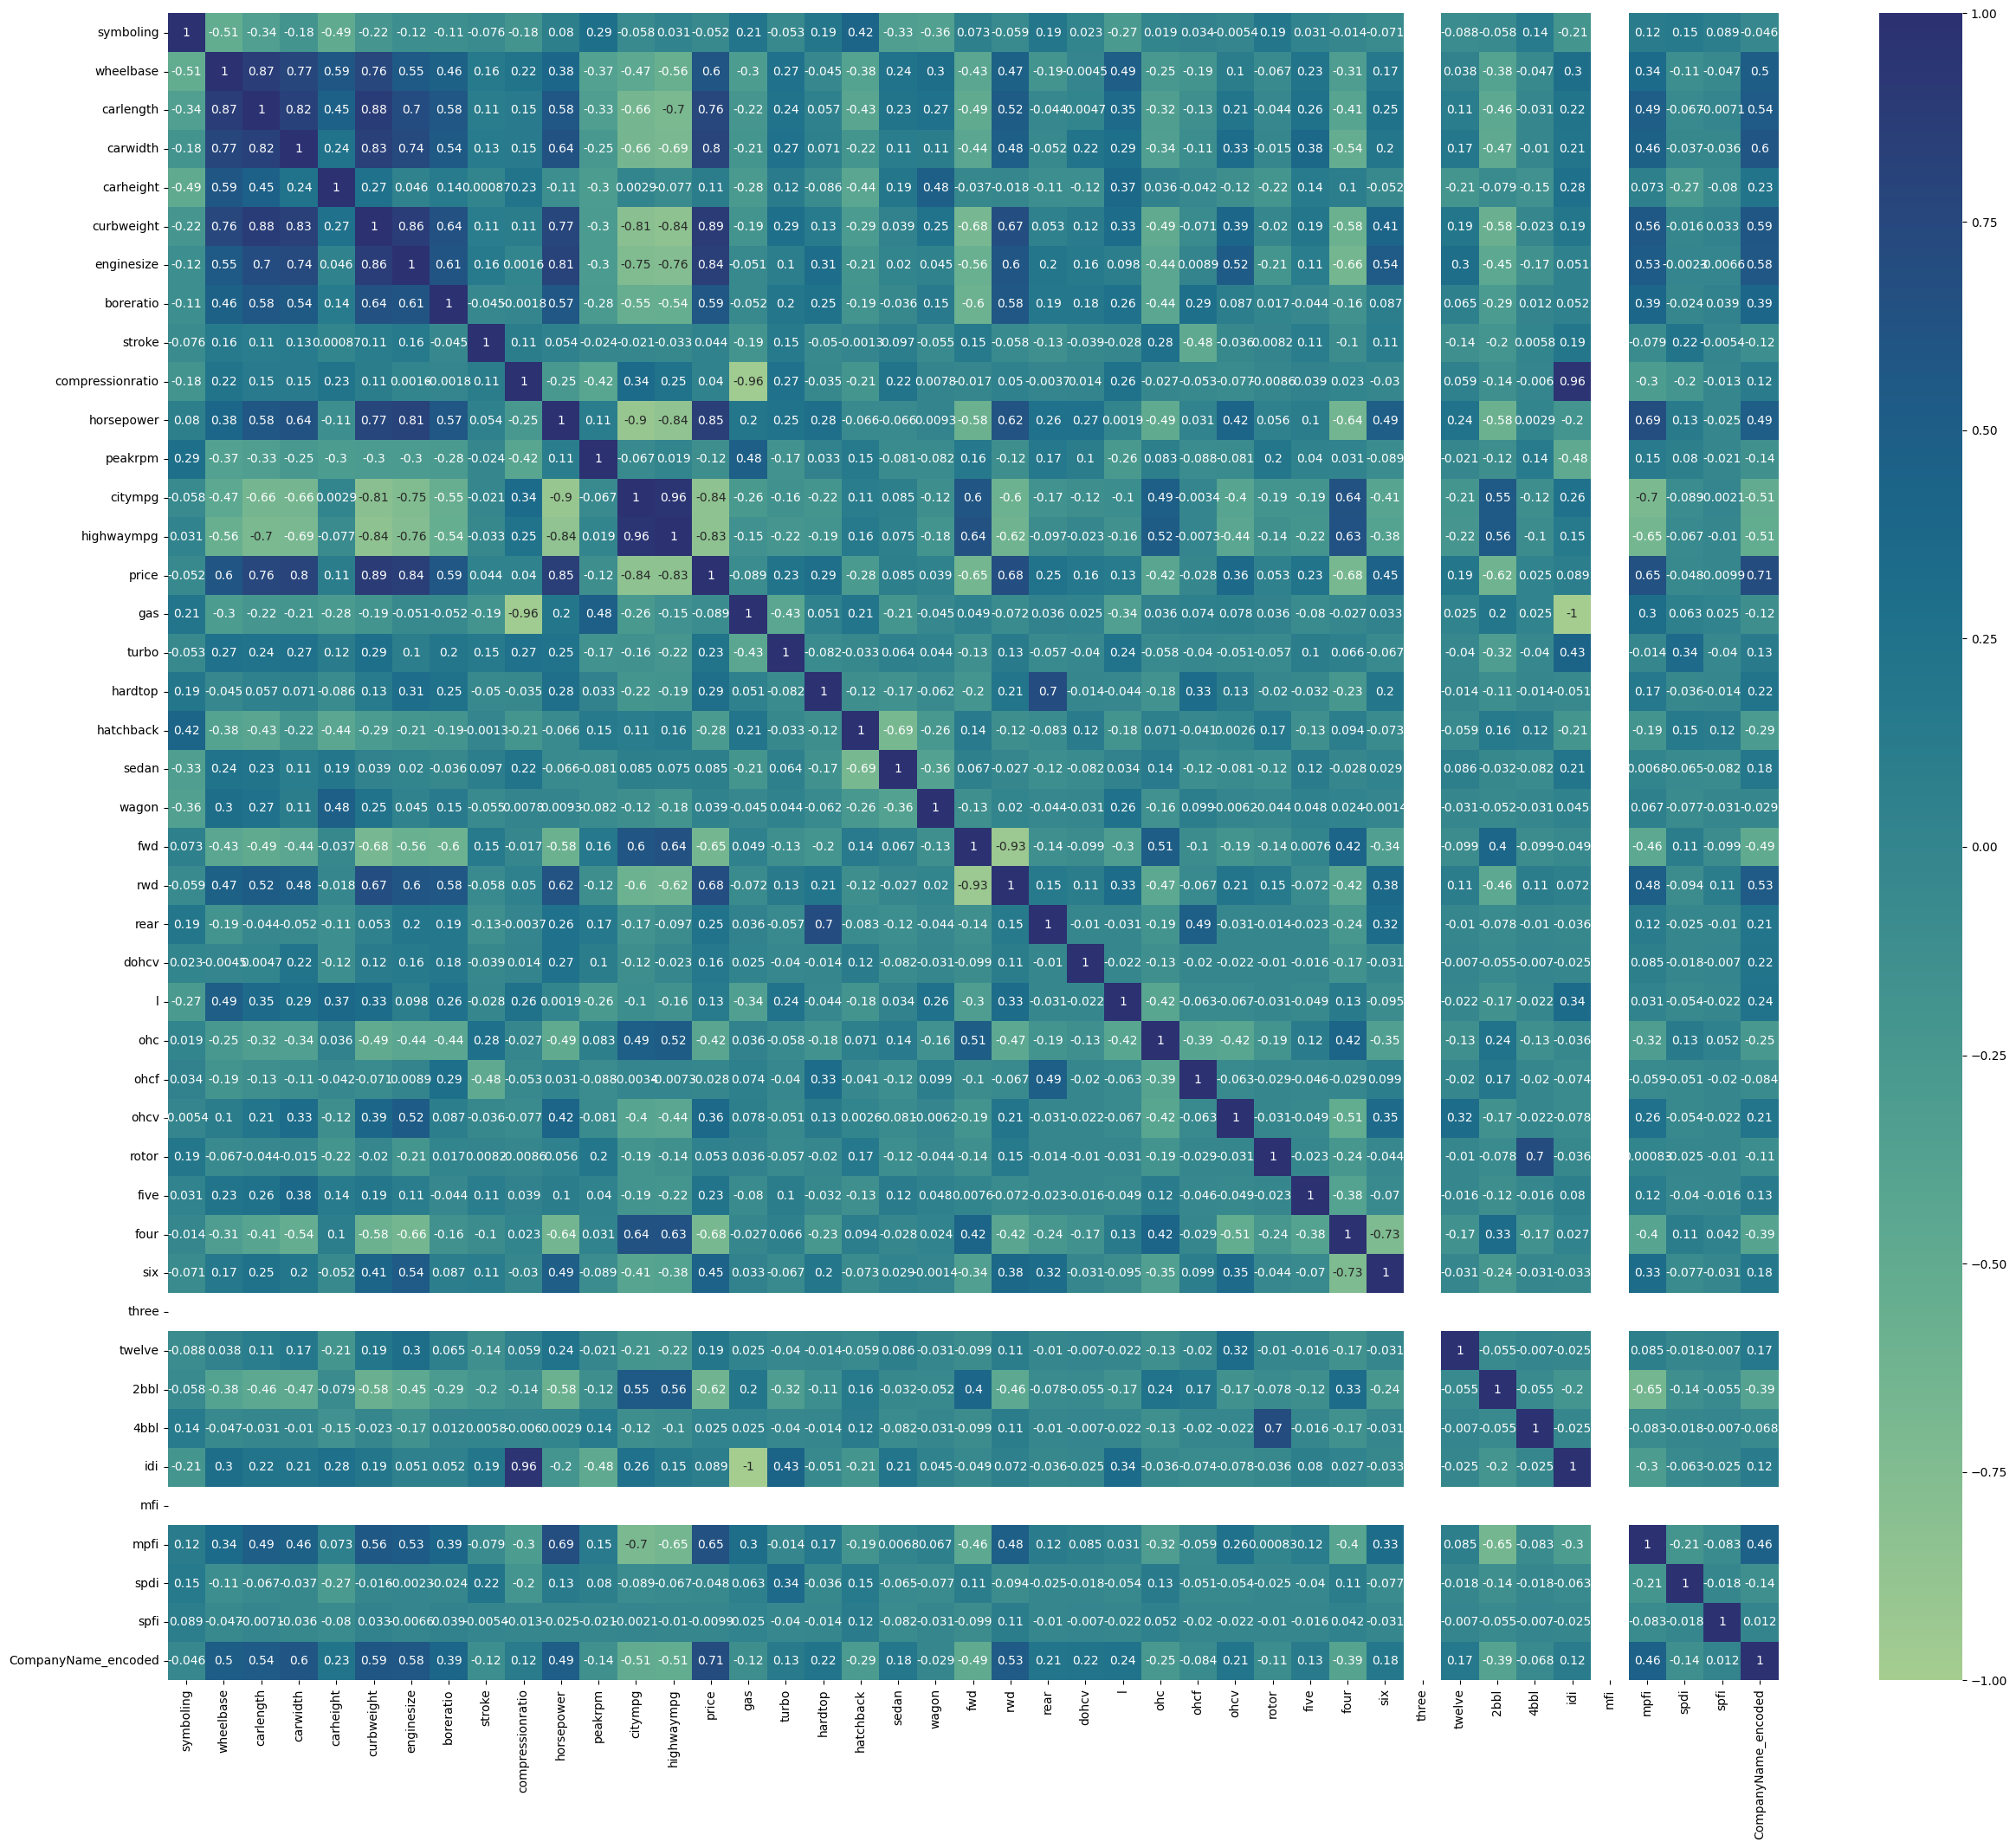

In [49]:
# corrolation
plt.figure(figsize=(30,25))
custom_palette = sns.color_palette("crest", as_cmap=True)

sns.heatmap(df_train.corr(),annot=True, cmap=custom_palette)
plt.show()

In [50]:
corr_matrix = df_train.corr()

threshold = 0.7 # Adjust the threshold value as needed

# Find features with correlation above the threshold
high_corr_features = np.where(np.abs(corr_matrix) > threshold)

# Get unique feature pairs with high correlation
high_corr_pairs = [(corr_matrix.index[X], corr_matrix.columns[y]) for X, y in zip(*high_corr_features)
                   if X != y and X < y]

# Print the pairs of highly correlated features
for feature_pair in high_corr_pairs:
    print("Highly correlated features:", feature_pair)

Highly correlated features: ('wheelbase', 'carlength')
Highly correlated features: ('wheelbase', 'carwidth')
Highly correlated features: ('wheelbase', 'curbweight')
Highly correlated features: ('carlength', 'carwidth')
Highly correlated features: ('carlength', 'curbweight')
Highly correlated features: ('carlength', 'enginesize')
Highly correlated features: ('carlength', 'price')
Highly correlated features: ('carwidth', 'curbweight')
Highly correlated features: ('carwidth', 'enginesize')
Highly correlated features: ('carwidth', 'price')
Highly correlated features: ('curbweight', 'enginesize')
Highly correlated features: ('curbweight', 'horsepower')
Highly correlated features: ('curbweight', 'citympg')
Highly correlated features: ('curbweight', 'highwaympg')
Highly correlated features: ('curbweight', 'price')
Highly correlated features: ('enginesize', 'horsepower')
Highly correlated features: ('enginesize', 'citympg')
Highly correlated features: ('enginesize', 'highwaympg')
Highly correl

# Exhaustive Feature Selection  for Regression


In [51]:
#from mlxtend.feature_selection import ExhaustiveFeatureSelector

# Initialize the regression model
#reg_model = linear_model.LinearRegression()

# Initialize the ExhaustiveFeatureSelector
#efs = ExhaustiveFeatureSelector(reg_model,min_features=6,max_features=8,scoring='r2', cv=5,
#n_jobs=-1).fit(x_train,y_train)
#selected_features = boston.feature_names[list(efs.best_idx_)]
#%time

# Forward Search

In [52]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

model_1_feature = LinearRegression()

sfs = SFS(model_1_feature,cv=10,n_jobs=1,k_features=(6,9),scoring='r2').fit(x_train,y_train)
sfs.k_feature_names_

('curbweight',
 'horsepower',
 'wagon',
 'rear',
 'ohc',
 'four',
 '2bbl',
 'spdi',
 'CompanyName_encoded')

In [53]:
pd.DataFrame(sfs.get_metric_dict()).T

feature_idx  \
1                                 (5,)   
2                              (5, 10)   
3                          (5, 10, 41)   
4                      (5, 10, 30, 41)   
5                  (5, 10, 25, 30, 41)   
6              (5, 10, 25, 30, 34, 41)   
7          (5, 10, 22, 25, 30, 34, 41)   
8      (5, 10, 19, 22, 25, 30, 34, 41)   
9  (5, 10, 19, 22, 25, 30, 34, 39, 41)   

                                           cv_scores avg_score  \
1  [0.786101212946289, 0.706387848332017, 0.63547...  0.713313   
2  [0.8787778775881394, 0.835506718632566, 0.7781...  0.815478   
3  [0.8405276638602149, 0.8756487877741718, 0.876...  0.862445   
4  [0.8242114490036214, 0.8919397410644802, 0.898...  0.872696   
5  [0.8451798318920667, 0.891263470651524, 0.9006...   0.87914   
6  [0.8521189661066759, 0.8957139287021244, 0.898...  0.883042   
7  [0.8515473432821743, 0.9324317646298875, 0.914...  0.887781   
8  [0.8569654658611241, 0.9272354085416077, 0.924...  0.892087   
9  [0.8727255755815077, 0.9428800238133042, 0.925...   0.89615   

                                       feature_names  ci_bound   std_dev  \
1                                      (curbweight,)  0.194263  0.261559   
2                           (curbweight, horsepower)  0.082565  0.111167   
3      (curbweight, horsepower, CompanyName_encoded)  0.058242  0.078418   
4  (curbweight, horsepower, four, CompanyName_enc...  0.058197  0.078357   
5  (curbweight, horsepower, ohc, four, CompanyNam...  0.051069   0.06876   
6  (curbweight, horsepower, ohc, four, 2bbl, Comp...  0.048512  0.065317   
7  (curbweight, horsepower, rear, ohc, four, 2bbl...  0.053487  0.072015   
8  (curbweight, horsepower, wagon, rear, ohc, fou...  0.051257  0.069013   
9  (curbweight, horsepower, wagon, rear, ohc, fou...  0.046273  0.062303   

    std_err  
1  0.087186  
2  0.037056  
3  0.026139  
4  0.026119  
5   0.02292  
6  0.021772  
7  0.024005  
8  0.023004  
9  0.020768

In [54]:
sfs.k_score_

0.8961502874716925

# backward Feature Selection 

In [55]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS1

sfs1 = SFS1(model_1_feature,cv=10,n_jobs=1,k_features=(6,10),forward=False
            ,scoring='r2').fit(x_train,y_train)
sfs1.k_feature_names_

('carwidth',
 'curbweight',
 'horsepower',
 'hatchback',
 'sedan',
 'wagon',
 'rear',
 'ohc',
 'rotor',
 'CompanyName_encoded')

In [56]:
pd.DataFrame(sfs1.get_metric_dict()).T

feature_idx  \
42  (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...   
41  (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...   
40  (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...   
39  (0, 1, 2, 3, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...   
38  (0, 1, 2, 3, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...   
37  (0, 1, 2, 3, 5, 6, 8, 9, 10, 11, 12, 13, 14, 1...   
36  (0, 1, 2, 3, 5, 8, 9, 10, 11, 12, 13, 14, 15, ...   
35  (0, 1, 2, 3, 5, 8, 9, 10, 11, 12, 14, 15, 16, ...   
34  (0, 1, 2, 3, 5, 8, 9, 10, 11, 12, 14, 16, 17, ...   
33  (0, 1, 2, 3, 5, 8, 10, 11, 12, 14, 16, 17, 18,...   
32  (0, 1, 2, 3, 5, 8, 10, 11, 12, 14, 16, 17, 18,...   
31  (0, 1, 2, 3, 5, 8, 10, 11, 12, 14, 16, 17, 18,...   
30  (0, 1, 2, 3, 5, 8, 10, 11, 12, 14, 16, 17, 18,...   
29  (0, 1, 2, 3, 5, 8, 10, 11, 12, 14, 16, 17, 18,...   
28  (0, 1, 3, 5, 8, 10, 11, 12, 14, 16, 17, 18, 19...   
27  (0, 1, 3, 5, 8, 10, 11, 12, 14, 16, 17, 18, 19...   
26  (1, 3, 5, 8, 10, 11, 12, 14, 16, 17, 18, 19, 2...   
25  (1, 3, 5, 8, 10, 11, 12, 14, 16, 17, 18, 19, 2...   
24  (1, 3, 5, 8, 10, 11, 12, 14, 17, 18, 19, 22, 2...   
23  (1, 3, 5, 8, 10, 11, 12, 14, 17, 18, 19, 22, 2...   
22  (3, 5, 8, 10, 11, 12, 14, 17, 18, 19, 22, 24, ...   
21  (3, 5, 8, 10, 11, 14, 17, 18, 19, 22, 24, 25, ...   
20  (3, 5, 8, 10, 11, 14, 17, 18, 19, 22, 25, 28, ...   
19  (3, 5, 8, 10, 11, 14, 17, 18, 19, 22, 25, 28, ...   
18  (3, 5, 8, 10, 11, 14, 17, 18, 19, 22, 25, 28, ...   
17  (3, 5, 8, 10, 11, 14, 17, 18, 19, 22, 25, 28, ...   
16  (3, 5, 8, 10, 11, 14, 17, 18, 19, 22, 25, 28, ...   
15  (3, 5, 8, 10, 11, 14, 17, 18, 19, 22, 25, 28, ...   
14  (3, 5, 8, 10, 11, 17, 18, 19, 22, 25, 28, 30, ...   
13  (3, 5, 10, 11, 17, 18, 19, 22, 25, 28, 30, 39,...   
12     (3, 5, 10, 17, 18, 19, 22, 25, 28, 30, 39, 41)   
11         (3, 5, 10, 17, 18, 19, 22, 25, 28, 39, 41)   
10             (3, 5, 10, 17, 18, 19, 22, 25, 28, 41)   
9                  (3, 5, 10, 17, 18, 19, 25, 28, 41)   
8                     (5, 10, 17, 18, 19, 25, 28, 41)   
7                         (5, 10, 17, 19, 25, 28, 41)   
6                             (5, 10, 17, 19, 28, 41)   

                                            cv_scores avg_score  \
42  [0.8308326209790395, 0.9014504569001676, 0.917...  0.849452   
41  [0.8231370823708927, 0.9292483645441582, 0.924...  0.866355   
40  [0.8192107942646973, 0.9235984155108983, 0.931...  0.875094   
39  [0.8174612906775469, 0.9335257599498417, 0.930...  0.880561   
38  [0.8192174497406939, 0.9335767941577655, 0.930...   0.88487   
37  [0.8224752873438161, 0.9400132668174302, 0.931...  0.887829   
36  [0.8228070538922465, 0.9410573835107108, 0.931...  0.891248   
35  [0.8215854579730444, 0.9396242142136528, 0.932...  0.894377   
34  [0.8242622741736065, 0.9411520878650621, 0.935...  0.897007   
33  [0.838900736324, 0.9426420471465455, 0.9356750...  0.898656   
32  [0.8411009995097792, 0.9425665774967884, 0.935...  0.899561   
31  [0.8460677443922726, 0.9388897382725007, 0.938...  0.900528   
30  [0.845256707890423, 0.942442795795116, 0.93834...  0.902319   
29  [0.8464505893150146, 0.9504077624726687, 0.939...  0.903454   
28  [0.8466101558384796, 0.9509956857831926, 0.941...  0.904287   
27  [0.8411940324545151, 0.9478926200447167, 0.945...  0.905279   
26  [0.8456308764389555, 0.9472432360860527, 0.944...   0.90612   
25  [0.8416384796774361, 0.9454767427412346, 0.945...  0.906431   
24  [0.8448246477944835, 0.9445674501126075, 0.944...  0.906849   
23  [0.8434632325965131, 0.944295371114382, 0.9436...   0.90754   
22  [0.8461858206056359, 0.943407219861038, 0.9412...  0.907927   
21  [0.8425052326107727, 0.9432508297412103, 0.940...  0.908651   
20  [0.8520913030238487, 0.9463458893585228, 0.939...  0.909491   
19  [0.8519762143369616, 0.9462803377239745, 0.939...  0.909845   
18  [0.8510171407518667, 0.9462803377239746, 0.939...  0.910009   
17  [0.851017140751867, 0.9462803377239749, 0.9390...  0.910009   
16  [0.851017140751867, 0.9462803377239746, 0.9390...  0.910009   

In [57]:
sfs1.k_score_

0.903993366011625

 ## **RFE** is basically a backward selection of the predictors.

In [58]:
rfe = RFE(model_1_feature,n_features_to_select=10).fit(x_train, y_train)
rfe.ranking_


array([23, 24, 28,  8, 21,  1, 30, 29, 17, 20,  1, 27, 19, 18, 25, 31,  1,
        1,  1,  1, 13, 14,  1,  4,  7,  1, 16,  6,  1,  9,  2, 10, 32,  3,
       12, 22, 26, 33, 15,  1, 11,  5])

In [59]:
list(zip(x_train.columns,rfe.support_,rfe.ranking_))

[('symboling', False, 23),
 ('wheelbase', False, 24),
 ('carlength', False, 28),
 ('carwidth', False, 8),
 ('carheight', False, 21),
 ('curbweight', True, 1),
 ('enginesize', False, 30),
 ('boreratio', False, 29),
 ('stroke', False, 17),
 ('compressionratio', False, 20),
 ('horsepower', True, 1),
 ('peakrpm', False, 27),
 ('citympg', False, 19),
 ('highwaympg', False, 18),
 ('gas', False, 25),
 ('turbo', False, 31),
 ('hardtop', True, 1),
 ('hatchback', True, 1),
 ('sedan', True, 1),
 ('wagon', True, 1),
 ('fwd', False, 13),
 ('rwd', False, 14),
 ('rear', True, 1),
 ('dohcv', False, 4),
 ('l', False, 7),
 ('ohc', True, 1),
 ('ohcf', False, 16),
 ('ohcv', False, 6),
 ('rotor', True, 1),
 ('five', False, 9),
 ('four', False, 2),
 ('six', False, 10),
 ('three', False, 32),
 ('twelve', False, 3),
 ('2bbl', False, 12),
 ('4bbl', False, 22),
 ('idi', False, 26),
 ('mfi', False, 33),
 ('mpfi', False, 15),
 ('spdi', True, 1),
 ('spfi', False, 11),
 ('CompanyName_encoded', False, 5)]

In [60]:
x_train.columns[rfe.support_]

Index(['curbweight', 'horsepower', 'hardtop', 'hatchback', 'sedan', 'wagon',
       'rear', 'ohc', 'rotor', 'spdi'],
      dtype='object')

## Embeded method (tree_based) + permutation Feature Importance

In [61]:
import lightgbm
params_lgbm = {
   'boosting_type': ['gbdt','dart','goss','rf'],
    'num_leaves': [10,20,30],
   'learning_rate':[0.05, 0.1, 0.15],
    'n_estimators': [50,100],

    'colsample_bytree':[0.1, 0.3],
    'reg_alpha':[0.1, 0.3],
    'reg_lambda':[0.1, 0.3] ,
    'n_jobs': [-1],    
          
}
lgbm_best = GrdSrch_Tune(lightgbm.LGBMRegressor(random_state=42),x_train,y_train,params_lgbm)

best score is : -0.027221290717309294
best estimator is : LGBMRegressor(colsample_bytree=0.3, learning_rate=0.15, num_leaves=10,
              random_state=42, reg_alpha=0.1, reg_lambda=0.3)
best Params is {'boosting_type': 'gbdt', 'colsample_bytree': 0.3, 'learning_rate': 0.15, 'n_estimators': 100, 'n_jobs': -1, 'num_leaves': 10, 'reg_alpha': 0.1, 'reg_lambda': 0.3} :


In [63]:
import lightgbm
import sklearn.metrics as metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
lgbm_best = lightgbm.LGBMRegressor(boosting_type='gbdt' ,num_leaves=10 ,learning_rate=0.1 ,
                         reg_alpha=0.1,reg_lambda=0.3,colsample_bytree=0.3, random_state=42)
lgbm_best.fit(x_train,y_train,eval_set=(x_test,y_test)
              ,early_stopping_rounds= 50, eval_metric='r2')

lgbm_pred_reg = lgbm_best.predict(x_test,num_iteration=lgbm_best.best_iteration_)

rmse = np.sqrt(mean_squared_error(y_test, lgbm_pred_reg))
r2 = r2_score(y_test, lgbm_pred_reg)


[1]	valid_0's l2: 0.222132
[2]	valid_0's l2: 0.195184
[3]	valid_0's l2: 0.169438
[4]	valid_0's l2: 0.149664
[5]	valid_0's l2: 0.132042
[6]	valid_0's l2: 0.11863
[7]	valid_0's l2: 0.105882
[8]	valid_0's l2: 0.0940445
[9]	valid_0's l2: 0.0854978
[10]	valid_0's l2: 0.0778003
[11]	valid_0's l2: 0.0725886
[12]	valid_0's l2: 0.0674412
[13]	valid_0's l2: 0.0629231
[14]	valid_0's l2: 0.0598314
[15]	valid_0's l2: 0.0573896
[16]	valid_0's l2: 0.0536641
[17]	valid_0's l2: 0.0505697
[18]	valid_0's l2: 0.04822
[19]	valid_0's l2: 0.0466501
[20]	valid_0's l2: 0.0447646
[21]	valid_0's l2: 0.0431721
[22]	valid_0's l2: 0.0421462
[23]	valid_0's l2: 0.0409973
[24]	valid_0's l2: 0.0403847
[25]	valid_0's l2: 0.0399584
[26]	valid_0's l2: 0.0388521
[27]	valid_0's l2: 0.0384193
[28]	valid_0's l2: 0.0381882
[29]	valid_0's l2: 0.0380104
[30]	valid_0's l2: 0.03732
[31]	valid_0's l2: 0.0368316
[32]	valid_0's l2: 0.0363124
[33]	valid_0's l2: 0.0361494
[34]	valid_0's l2: 0.0358114
[35]	valid_0's l2: 0.0354373
[36]	v

In [64]:
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2) Score:", r2)

Root Mean Squared Error (RMSE): 0.16801662999142583
R-squared (R2) Score: 0.8903809533539699


In [65]:
lightGBM_Metrics = pd.DataFrame({'Model': 'LightGBM',
                          'r2score':r2_score(y_test,lgbm_pred_reg),
                          'MSE': metrics.mean_squared_error(y_test,lgbm_pred_reg),
                           'RMSE': np.sqrt(metrics.mean_squared_error(y_test,lgbm_pred_reg)),
                           'MSLE': metrics.mean_squared_log_error(y_test,lgbm_pred_reg),
                          'RMSLE':np.sqrt(metrics.mean_squared_log_error(y_test,lgbm_pred_reg))},index=[1])
lightGBM_Metrics  

Model   r2score      MSE      RMSE      MSLE     RMSLE
1  LightGBM  0.890381  0.02823  0.168017  0.000258  0.016068

In [66]:
lgbm_best.feature_importances_

array([ 7, 26, 43, 24, 12, 55, 24, 18, 31, 14, 40, 37,  6, 16,  0,  0,  0,
        7,  1,  0,  1,  4,  0,  0,  0,  7,  0,  0,  0,  0, 10,  0,  0,  0,
        2,  0,  0,  0,  3,  0,  0, 51])

Importance             Features
5           55           curbweight
41          51  CompanyName_encoded
2           43            carlength
10          40           horsepower
11          37              peakrpm
8           31               stroke
1           26            wheelbase
3           24             carwidth
6           24           enginesize
7           18            boreratio
13          16           highwaympg
9           14     compressionratio
4           12            carheight
30          10                 four
17           7            hatchback
25           7                  ohc
0            7            symboling
12           6              citympg
21           4                  rwd
38           3                 mpfi
34           2                 2bbl
20           1                  fwd
18           1                sedan
31           0                  six
40           0                 spfi
39           0                 spdi
37           0                  mfi
36           0                  idi
35           0                 4bbl
33           0               twelve
32           0                three
16           0              hardtop
28           0                rotor
27           0                 ohcv
26           0                 ohcf
14           0                  gas
24           0                    l
23           0                dohcv
22           0                 rear
15           0                turbo
19           0                wagon
29           0                 five

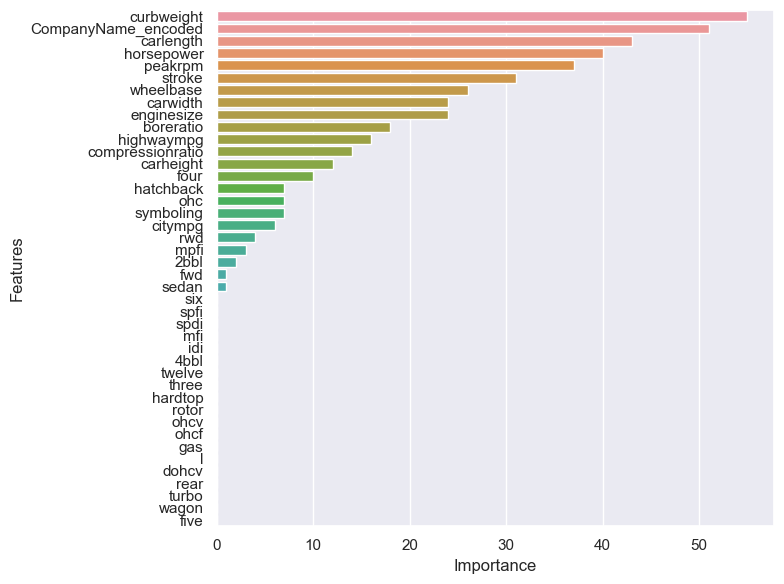

In [67]:
fearure_selection_lgbm = pd.DataFrame({'Importance':lgbm_best.feature_importances_,
                                       'Features':x_train.columns})
plt.figure(figsize=(8,6))
sns.set(font_scale = 1)
sns.barplot(x="Importance", y="Features", data=fearure_selection_lgbm.sort_values(by="Importance"
                                                                                 ,ascending=False))
plt.tight_layout()
fearure_selection_lgbm.sort_values(by = 'Importance',ascending=False)

In [68]:
import eli5
from eli5.sklearn import permutation_importance

In [69]:
from eli5 import show_weights
show_weights(lgbm_best)

In [70]:
feature_selected = ['curbweight','horsepower','highwaympg','CompanyName_encoded',
                    'four','enginesize','carwidth','wheelbase','peakrpm','carlength' ]

In [71]:
x_train_feature_selected = df_train[feature_selected]

# Now we can build  Regression Models

## Functions of Models and CheckVIF

In [72]:
def build_model(X,y):
    X = sm.add_constant(X)  #Adding the constant
    lm = sm.OLS(y,X).fit()  # fitting the model
    print(lm.summary())     # model summary
    return X
    
def checkVIF(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    
    #pythonic
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

### Model_1

In [73]:
build_model(x_train_feature_selected,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.905
Method:                 Least Squares   F-statistic:                     136.6
Date:                Sat, 05 Aug 2023   Prob (F-statistic):           1.49e-64
Time:                        18:12:42   Log-Likelihood:                 70.025
No. Observations:                 143   AIC:                            -118.0
Df Residuals:                     132   BIC:                            -85.46
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   9.5061    

const  curbweight  horsepower  highwaympg  CompanyName_encoded  four  \
177    1.0   -0.120012   -0.234446        3.50             0.144694     1   
75     1.0    0.748287    1.674495        3.22             0.144694     1   
174    1.0   -0.068935   -0.920472        3.53             0.071321     1   
31     1.0   -1.652303   -0.801163        3.66             0.144694     1   
12     1.0    0.390752    0.570888        3.37             0.144694     0   
..     ...         ...         ...         ...                  ...   ...   
106    1.0    1.105822    1.406050        3.26            -0.589039     0   
14     1.0    0.952593    0.570888        3.26             1.979029     0   
92     1.0   -1.345845   -1.069608        3.64            -0.295546     1   
179    1.0    0.901516    1.435877        3.22            -0.589039     0   
102    1.0    1.361204    1.256914        3.14            -0.478979     0   

     enginesize  carwidth  wheelbase   peakrpm  carlength  
177   -0.004628  0.186669   0.619022 -2.165246   0.056119  
75     0.510067  0.807453   0.619022 -0.255259   0.337699  
174   -0.372267  0.186669   0.619022 -1.422473   0.056119  
31    -1.034017 -1.054898  -2.241896  1.654729  -2.618889  
12     1.098290 -0.434114   0.450733 -2.059136   0.196909  
..          ...       ...        ...       ...        ...  
106    1.429165  0.807453   0.114154  0.169183   0.337699  
14     1.098290  0.497061   0.787312 -2.059136   1.182438  
92    -0.850197 -1.054898  -0.727292  0.169183  -0.788620  
179    1.245345  0.807453   0.619022  0.169183   0.760069  
102    1.429165  0.186669   0.282444  0.169183   0.760069  

[143 rows x 11 columns]

In [74]:
x_train_feature_selected.drop(["highwaympg",'enginesize','wheelbase','carwidth','peakrpm','carlength'], axis = 1,inplace=True)

## Final model with Tree_based Feature selection

In [75]:
build_model(x_train_feature_selected,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.907
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                     337.0
Date:                Sat, 05 Aug 2023   Prob (F-statistic):           3.83e-70
Time:                        18:12:45   Log-Likelihood:                 66.262
No. Observations:                 143   AIC:                            -122.5
Df Residuals:                     138   BIC:                            -107.7
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   9.5082    

const  curbweight  horsepower  CompanyName_encoded  four
177    1.0   -0.120012   -0.234446             0.144694     1
75     1.0    0.748287    1.674495             0.144694     1
174    1.0   -0.068935   -0.920472             0.071321     1
31     1.0   -1.652303   -0.801163             0.144694     1
12     1.0    0.390752    0.570888             0.144694     0
..     ...         ...         ...                  ...   ...
106    1.0    1.105822    1.406050            -0.589039     0
14     1.0    0.952593    0.570888             1.979029     0
92     1.0   -1.345845   -1.069608            -0.295546     1
179    1.0    0.901516    1.435877            -0.589039     0
102    1.0    1.361204    1.256914            -0.478979     0

[143 rows x 5 columns]

# CheckVIF

In [76]:
#Calculating the Variance Inflation Factor
checkVIF(x_train_feature_selected)

Features   VIF
0           curbweight  2.89
1           horsepower  2.54
2  CompanyName_encoded  1.54
3                 four  1.10

# Final-Models

In [77]:
x_train_feature_selected= sm.add_constant(x_train_feature_selected)
lm = sm.OLS(y_train,x_train_feature_selected).fit()
y_train_hat = lm.predict(x_train_feature_selected)

Text(0.5, 12.44444444444443, 'Error')

<Figure size 640x480 with 0 Axes>

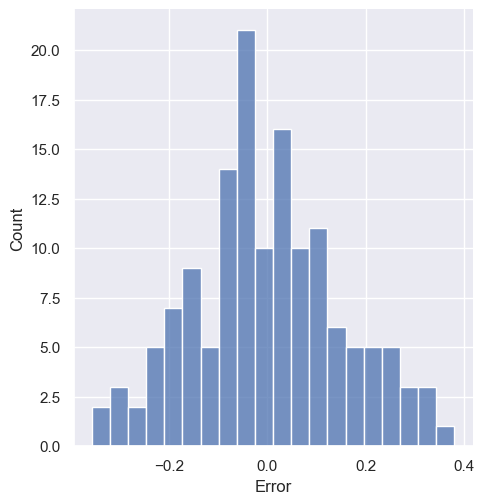

In [78]:
fig = plt.figure()
sns.displot((y_train - y_train_hat), bins=20)

fig.suptitle('Error Terms', fontsize = 20)             
plt.xlabel('Error')


In [79]:
residual = pd.DataFrame(y_train - y_train_hat, columns=['Residual'])
residual.head(15)

Residual
177  0.039592
75  -0.053753
174  0.091575
31  -0.048511
12   0.254198
35   0.036821
125  0.380769
42   0.141409
156 -0.120853
136  0.130314
140 -0.137988
51  -0.152432
113  0.100687
166 -0.066299
41   0.267707

# Evaluation & predictions

In [80]:
x_train_feature_selected.columns

Index(['const', 'curbweight', 'horsepower', 'CompanyName_encoded', 'four'], dtype='object')

In [81]:
#print(x_train_feature_selected)

# build a model for test dataframe
x_test_selected = x_test[x_train_feature_selected.columns.drop('const')]

# Adding a constant variable ;
x_test_selected = sm.add_constant(x_test_selected)
print(x_test_selected)
x_test_selected.columns

     const  curbweight  horsepower  CompanyName_encoded  four
15     1.0    1.259051    1.793804             0.144694     0
9      1.0    0.952593    1.406050             0.144694     0
100    1.0   -0.477546   -0.085310             0.144694     1
132    1.0    0.288599    0.302444             0.144694     1
68     1.0    2.025197    0.630543             0.144694     0
..     ...         ...         ...                  ...   ...
56     1.0   -0.273241    0.033999             0.511561     0
128    1.0    0.543981    2.181557             0.144694     0
76     1.0   -1.396921   -1.129262            -0.222173     1
144    1.0   -0.273241   -0.562545            -0.662413     1
104    1.0    1.003669    1.406050            -0.919220     0

[62 rows x 5 columns]


Index(['const', 'curbweight', 'horsepower', 'CompanyName_encoded', 'four'], dtype='object')

In [82]:
y_pred = lm.predict(x_test_selected)

In [83]:
from sklearn.metrics import r2_score ,mean_squared_error
print(r2_score(y_test, y_pred))
print(mean_squared_error(y_test, y_pred))

0.8836296588549237
0.02996821155690234


# use another method Feature selection (RFE Method)

In [84]:
x_train_feature_selected_rfe =x_train[x_train.columns[rfe.support_]]
x_train_feature_selected_rfe

curbweight  horsepower  hardtop  hatchback  sedan  wagon  rear  ohc  \
177   -0.120012   -0.234446        0          1      0      0     0    1   
75     0.748287    1.674495        0          1      0      0     0    1   
174   -0.068935   -0.920472        0          0      1      0     0    1   
31    -1.652303   -0.801163        0          1      0      0     0    1   
12     0.390752    0.570888        0          0      1      0     0    1   
..          ...         ...      ...        ...    ...    ...   ...  ...   
106    1.105822    1.406050        0          1      0      0     0    0   
14     0.952593    0.570888        0          0      1      0     0    1   
92    -1.345845   -1.069608        0          0      1      0     0    1   
179    0.901516    1.435877        0          1      0      0     0    0   
102    1.361204    1.256914        0          0      0      1     0    0   

     rotor  spdi  
177      0     0  
75       0     0  
174      0     0  
31       0     0  
12       0     0  
..     ...   ...  
106      0     0  
14       0     0  
92       0     0  
179      0     0  
102      0     0  

[143 rows x 10 columns]

# model 1

In [85]:
build_model(x_train_feature_selected_rfe,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.906
Method:                 Least Squares   F-statistic:                     137.1
Date:                Sat, 05 Aug 2023   Prob (F-statistic):           1.22e-64
Time:                        18:13:03   Log-Likelihood:                 70.242
No. Observations:                 143   AIC:                            -118.5
Df Residuals:                     132   BIC:                            -85.89
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.4765      0.072    132.422      0.0

const  curbweight  horsepower  hardtop  hatchback  sedan  wagon  rear  \
177    1.0   -0.120012   -0.234446        0          1      0      0     0   
75     1.0    0.748287    1.674495        0          1      0      0     0   
174    1.0   -0.068935   -0.920472        0          0      1      0     0   
31     1.0   -1.652303   -0.801163        0          1      0      0     0   
12     1.0    0.390752    0.570888        0          0      1      0     0   
..     ...         ...         ...      ...        ...    ...    ...   ...   
106    1.0    1.105822    1.406050        0          1      0      0     0   
14     1.0    0.952593    0.570888        0          0      1      0     0   
92     1.0   -1.345845   -1.069608        0          0      1      0     0   
179    1.0    0.901516    1.435877        0          1      0      0     0   
102    1.0    1.361204    1.256914        0          0      0      1     0   

     ohc  rotor  spdi  
177    1      0     0  
75     1      0     0  
174    1      0     0  
31     1      0     0  
12     1      0     0  
..   ...    ...   ...  
106    0      0     0  
14     1      0     0  
92     1      0     0  
179    0      0     0  
102    0      0     0  

[143 rows x 11 columns]

In [86]:
x_train_feature_selected_rfe.drop('hardtop',axis=1,inplace=True)

# Final model with RFE Feature selection

In [87]:
build_model(x_train_feature_selected_rfe,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.906
Method:                 Least Squares   F-statistic:                     152.5
Date:                Sat, 05 Aug 2023   Prob (F-statistic):           1.39e-65
Time:                        18:13:06   Log-Likelihood:                 69.834
No. Observations:                 143   AIC:                            -119.7
Df Residuals:                     133   BIC:                            -90.04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.4463      0.062    151.200      0.0

const  curbweight  horsepower  hatchback  sedan  wagon  rear  ohc  rotor  \
177    1.0   -0.120012   -0.234446          1      0      0     0    1      0   
75     1.0    0.748287    1.674495          1      0      0     0    1      0   
174    1.0   -0.068935   -0.920472          0      1      0     0    1      0   
31     1.0   -1.652303   -0.801163          1      0      0     0    1      0   
12     1.0    0.390752    0.570888          0      1      0     0    1      0   
..     ...         ...         ...        ...    ...    ...   ...  ...    ...   
106    1.0    1.105822    1.406050          1      0      0     0    0      0   
14     1.0    0.952593    0.570888          0      1      0     0    1      0   
92     1.0   -1.345845   -1.069608          0      1      0     0    1      0   
179    1.0    0.901516    1.435877          1      0      0     0    0      0   
102    1.0    1.361204    1.256914          0      0      1     0    0      0   

     spdi  
177     0  
75      0  
174     0  
31      0  
12      0  
..    ...  
106     0  
14      0  
92      0  
179     0  
102     0  

[143 rows x 10 columns]

# CheckVIF

In [88]:
checkVIF(x_train_feature_selected_rfe)

Features   VIF
6         ohc  4.98
0  curbweight  3.66
1  horsepower  3.55
3       sedan  3.07
2   hatchback  2.37
4       wagon  1.49
5        rear  1.17
8        spdi  1.16
7       rotor  1.10

In [89]:
x_train_feature_selected_rfe = sm.add_constant(x_train_feature_selected_rfe)
lm_1 = sm.OLS(y_train,x_train_feature_selected_rfe).fit()
y_hat_rfe= lm_1.predict(x_train_feature_selected_rfe)

In [90]:
pd.DataFrame((y_train - y_hat_rfe),columns=['Residuls'])

Residuls
177  0.042794
75  -0.198268
174  0.012377
31   0.162798
12   0.271914
..        ...
106 -0.018094
14   0.239878
92   0.024156
179 -0.093330
102 -0.218019

[143 rows x 1 columns]

Text(0.5, 12.44444444444443, 'Error')

<Figure size 640x480 with 0 Axes>

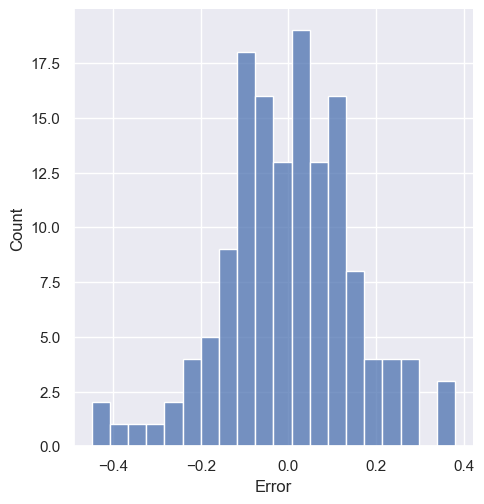

In [91]:
fig = plt.figure()
sns.displot((y_train - y_hat_rfe), bins=20)

fig.suptitle('Error Terms', fontsize = 20)             
plt.xlabel('Error')


In [92]:
x_train_feature_selected_rfe = x_train_feature_selected_rfe.drop('const',axis=1)


# build a model for test dataframe
x_test_selected_rfe = x_test[x_train_feature_selected_rfe.columns]

# Adding a constant variable 
x_test_selected_rfe = sm.add_constant(x_test_selected_rfe)
x_test_selected_rfe

const  curbweight  horsepower  hatchback  sedan  wagon  rear  ohc  rotor  \
15     1.0    1.259051    1.793804          0      1      0     0    1      0   
9      1.0    0.952593    1.406050          1      0      0     0    1      0   
100    1.0   -0.477546   -0.085310          0      1      0     0    1      0   
132    1.0    0.288599    0.302444          1      0      0     0    1      0   
68     1.0    2.025197    0.630543          0      0      1     0    1      0   
..     ...         ...         ...        ...    ...    ...   ...  ...    ...   
56     1.0   -0.273241    0.033999          1      0      0     0    0      1   
128    1.0    0.543981    2.181557          0      0      0     1    0      0   
76     1.0   -1.396921   -1.129262          1      0      0     0    1      0   
144    1.0   -0.273241   -0.562545          0      1      0     0    0      0   
104    1.0    1.003669    1.406050          1      0      0     0    0      0   

     spdi  
15      0  
9       0  
100     0  
132     0  
68      0  
..    ...  
56      0  
128     0  
76      0  
144     0  
104     0  

[62 rows x 10 columns]

In [93]:
y_pred_rfe = lm_1.predict(x_test_selected_rfe)

In [94]:
from sklearn.metrics import r2_score ,mean_squared_error
print(r2_score(y_test, y_pred_rfe))
print(mean_squared_error(y_test, y_pred_rfe))

0.8308209689676844
0.043567741944208406


# use backward method feature selection

In [95]:
x_train_feature_selected_sfs1 = x_train[['carwidth','curbweight','horsepower','hatchback','sedan',
 'wagon','rear','ohc','rotor','CompanyName_encoded']]
x_train_feature_selected_sfs1

carwidth  curbweight  horsepower  hatchback  sedan  wagon  rear  ohc  \
177  0.186669   -0.120012   -0.234446          1      0      0     0    1   
75   0.807453    0.748287    1.674495          1      0      0     0    1   
174  0.186669   -0.068935   -0.920472          0      1      0     0    1   
31  -1.054898   -1.652303   -0.801163          1      0      0     0    1   
12  -0.434114    0.390752    0.570888          0      1      0     0    1   
..        ...         ...         ...        ...    ...    ...   ...  ...   
106  0.807453    1.105822    1.406050          1      0      0     0    0   
14   0.497061    0.952593    0.570888          0      1      0     0    1   
92  -1.054898   -1.345845   -1.069608          0      1      0     0    1   
179  0.807453    0.901516    1.435877          1      0      0     0    0   
102  0.186669    1.361204    1.256914          0      0      1     0    0   

     rotor  CompanyName_encoded  
177      0             0.144694  
75       0             0.144694  
174      0             0.071321  
31       0             0.144694  
12       0             0.144694  
..     ...                  ...  
106      0            -0.589039  
14       0             1.979029  
92       0            -0.295546  
179      0            -0.589039  
102      0            -0.478979  

[143 rows x 10 columns]

# Final model with Backward_search Feature selection

In [96]:
build_model(x_train_feature_selected_sfs1,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                     184.3
Date:                Sat, 05 Aug 2023   Prob (F-statistic):           1.96e-72
Time:                        18:13:30   Log-Likelihood:                 89.783
No. Observations:                 143   AIC:                            -157.6
Df Residuals:                     132   BIC:                            -125.0
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   9.4722    

const  carwidth  curbweight  horsepower  hatchback  sedan  wagon  rear  \
177    1.0  0.186669   -0.120012   -0.234446          1      0      0     0   
75     1.0  0.807453    0.748287    1.674495          1      0      0     0   
174    1.0  0.186669   -0.068935   -0.920472          0      1      0     0   
31     1.0 -1.054898   -1.652303   -0.801163          1      0      0     0   
12     1.0 -0.434114    0.390752    0.570888          0      1      0     0   
..     ...       ...         ...         ...        ...    ...    ...   ...   
106    1.0  0.807453    1.105822    1.406050          1      0      0     0   
14     1.0  0.497061    0.952593    0.570888          0      1      0     0   
92     1.0 -1.054898   -1.345845   -1.069608          0      1      0     0   
179    1.0  0.807453    0.901516    1.435877          1      0      0     0   
102    1.0  0.186669    1.361204    1.256914          0      0      1     0   

     ohc  rotor  CompanyName_encoded  
177    1      0             0.144694  
75     1      0             0.144694  
174    1      0             0.071321  
31     1      0             0.144694  
12     1      0             0.144694  
..   ...    ...                  ...  
106    0      0            -0.589039  
14     1      0             1.979029  
92     1      0            -0.295546  
179    0      0            -0.589039  
102    0      0            -0.478979  

[143 rows x 11 columns]

# checkVIF

In [97]:
checkVIF(x_train_feature_selected_sfs1)

Features   VIF
1           curbweight  6.54
7                  ohc  4.88
0             carwidth  3.79
2           horsepower  3.37
4                sedan  3.06
3            hatchback  2.40
9  CompanyName_encoded  1.90
5                wagon  1.58
6                 rear  1.28
8                rotor  1.11

In [98]:
x_train_feature_selected_sfs1 = sm.add_constant(x_train_feature_selected_sfs1)
lm_2 = sm.OLS(y_train,x_train_feature_selected_sfs1).fit()
y_hat_sfs1 = lm_2.predict(x_train_feature_selected_sfs1)

In [99]:
pd.DataFrame((y_train-y_hat_sfs1),columns=['Residuals'])

Residuals
177   0.019307
75   -0.136534
174   0.005476
31    0.049158
12    0.377652
..         ...
106   0.103222
14    0.179516
92   -0.005300
179   0.006446
102  -0.099810

[143 rows x 1 columns]

Text(0.5, 12.44444444444443, 'Error')

<Figure size 640x480 with 0 Axes>

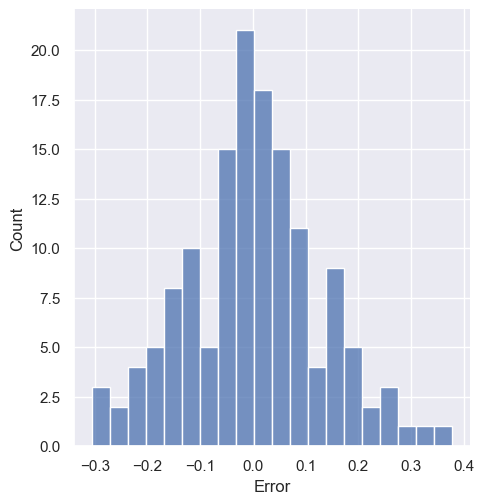

In [100]:
fig = plt.figure()
sns.displot((y_train - y_hat_sfs1), bins=20)

fig.suptitle('Error Terms', fontsize = 20)             
plt.xlabel('Error')


In [101]:
x_train_feature_selected_sfs1 = x_train_feature_selected_sfs1.drop('const',axis=1)


# build a model for test dataframe
x_test_selected_sfs1 = x_test[x_train_feature_selected_sfs1.columns]

# Adding a constant variable 
x_test_selected_sfs1 = sm.add_constant(x_test_selected_sfs1)
x_test_selected_sfs1

const  carwidth  curbweight  horsepower  hatchback  sedan  wagon  rear  \
15     1.0  0.497061    1.259051    1.793804          0      1      0     0   
9      1.0  0.807453    0.952593    1.406050          1      0      0     0   
100    1.0 -0.434114   -0.477546   -0.085310          0      1      0     0   
132    1.0  0.186669    0.288599    0.302444          1      0      0     0   
68     1.0  2.049020    2.025197    0.630543          0      0      1     0   
..     ...       ...         ...         ...        ...    ...    ...   ...   
56     1.0 -0.123723   -0.273241    0.033999          1      0      0     0   
128    1.0 -0.434114    0.543981    2.181557          0      0      0     1   
76     1.0 -0.744506   -1.396921   -1.129262          1      0      0     0   
144    1.0 -0.123723   -0.273241   -0.562545          0      1      0     0   
104    1.0  0.807453    1.003669    1.406050          1      0      0     0   

     ohc  rotor  CompanyName_encoded  
15     1      0             0.144694  
9      1      0             0.144694  
100    1      0             0.144694  
132    1      0             0.144694  
68     1      0             0.144694  
..   ...    ...                  ...  
56     0      1             0.511561  
128    0      0             0.144694  
76     1      0            -0.222173  
144    0      0            -0.662413  
104    0      0            -0.919220  

[62 rows x 11 columns]

In [102]:
y_pred_sfs1 = lm_2.predict(x_test_selected_sfs1)

In [103]:
from sklearn.metrics import r2_score ,mean_squared_error
print(r2_score(y_test, y_pred_sfs1))
print(mean_squared_error(y_test, y_pred_sfs1))

0.8536259620628512
0.037694897962616505


# Regression with ML models 

In [104]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
import sklearn.metrics as metrics

# SVR

In [105]:
params_svr = { 'kernel' : ['linear', 'poly', 'sigmoid'],
    'degree' : [2,3,4], 'gamma' : ['scale', 'auto'], 'C': [0.2,1,10,80],  'epsilon': [0.1,1,5]
       }


In [106]:
GrdSrch_Tune(SVR(),x_train,y_train,params_svr)

best score is : -0.02292523456567146
best estimator is : SVR(C=1, degree=2, gamma='auto', kernel='poly')
best Params is {'C': 1, 'degree': 2, 'epsilon': 0.1, 'gamma': 'auto', 'kernel': 'poly'} :


-0.02292523456567146

In [107]:
svr_1 = SVR(C=1, degree=2, epsilon= 0.1, gamma= 'auto', kernel='poly').fit(x_train,y_train)
y_pred_svr = svr_1.predict(x_test)

In [108]:
pd.DataFrame({
    'actual_value' : y_test,
    'predict_value': y_pred_svr
})

actual_value  predict_value
15          10.33      10.099220
9            9.79       9.754655
100          9.16       9.183897
132          9.38       9.546074
68          10.25      10.012204
..            ...            ...
56           9.38       9.516487
128         10.52      10.168316
76           8.59       8.751154
144          9.13       9.136457
104          9.75       9.776226

[62 rows x 2 columns]

In [109]:
svmMetrics = pd.DataFrame({'Model': 'Support Vector',
                          'r2score':r2_score(y_test,y_pred_svr),
                          'MSE': metrics.mean_squared_error(y_test,y_pred_svr),
                           'RMSE': np.sqrt(metrics.mean_squared_error(y_test,y_pred_svr)),
                           'MSLE': metrics.mean_squared_log_error(y_test,y_pred_svr),
                          'RMSLE':np.sqrt(metrics.mean_squared_log_error(y_test,y_pred_svr))},index=[1])
svmMetrics  

Model   r2score       MSE     RMSE      MSLE     RMSLE
1  Support Vector  0.903209  0.024926  0.15788  0.000232  0.015248

# Desission Tree Regressor

In [110]:
tree_parames = {
    'criterion':['squared_error','friedman_mse','absolute_error'],
    'splitter':['best','random'],
    'max_depth':[3,6,8],
    'min_samples_split':[2,4],
    'min_samples_leaf' :[1,2,5]
   
}
GrdSrch_Tune(DecisionTreeRegressor(random_state=42),x_train,y_train,tree_parames)

best score is : -0.02888139162561577
best estimator is : DecisionTreeRegressor(criterion='absolute_error', max_depth=6,
                      min_samples_leaf=2, random_state=42)
best Params is {'criterion': 'absolute_error', 'max_depth': 6, 'min_samples_leaf': 2, 'min_samples_split': 2, 'splitter': 'best'} :


-0.02888139162561577

In [111]:
DT_model = DecisionTreeRegressor(criterion='absolute_error', max_depth= 6, min_samples_leaf= 2, 
                                 min_samples_split= 2, splitter='best').fit(x_train,y_train)
y_pred_DT = DT_model.predict(x_test)

In [112]:
DTMetrics = pd.DataFrame({'Model': 'Desission Tree Regressor',
                          'r2score':r2_score(y_test,y_pred_DT),
                          'MSE': metrics.mean_squared_error(y_test,y_pred_DT),
                           'RMSE': np.sqrt(metrics.mean_squared_error(y_test,y_pred_DT)),
                           'MSLE': metrics.mean_squared_log_error(y_test,y_pred_DT),
                          'RMSLE':np.sqrt(metrics.mean_squared_log_error(y_test,y_pred_DT))},index=[1])
DTMetrics  

Model   r2score       MSE      RMSE      MSLE     RMSLE
1  Desission Tree Regressor  0.874617  0.032289  0.179692  0.000298  0.017252

# knn Regressor

In [113]:
knn_parames = {
          'n_neighbors': [3,5,7],
    'weights':['uniform', 'distance'],
    'p':[1,2],
}
GrdSrch_Tune(KNeighborsRegressor(),x_train,y_train,knn_parames)

best score is : -0.030725548377933204
best estimator is : KNeighborsRegressor(n_neighbors=7, p=1, weights='distance')
best Params is {'n_neighbors': 7, 'p': 1, 'weights': 'distance'} :


-0.030725548377933204

In [114]:
knn_model = KNeighborsRegressor(n_neighbors=7, p=1, weights='distance')
knn_model.fit(x_train,y_train)
y_pred_knn = knn_model.predict(x_test)

In [115]:
KNNMetrics = pd.DataFrame({'Model': 'KNN Regressor',
                          'r2score':r2_score(y_test,y_pred_knn),
                          'MSE': metrics.mean_squared_error(y_test,y_pred_knn),
                           'RMSE': np.sqrt(metrics.mean_squared_error(y_test,y_pred_knn)),
                           'MSLE': metrics.mean_squared_log_error(y_test,y_pred_knn),
                          'RMSLE':np.sqrt(metrics.mean_squared_log_error(y_test,y_pred_knn))},index=[1])
KNNMetrics  

Model   r2score       MSE      RMSE      MSLE     RMSLE
1  KNN Regressor  0.875728  0.032003  0.178894  0.000285  0.016873

# Xgboost

In [116]:
import xgboost

In [117]:
xgboost_parames = { 'n_estimators' :[100],

    'max_depth' : [3,5,10] ,
    'grow_policy' :[0,1],
    'learning_rate' : [0.1 , 0.2 , 1.3],
    'booster': ['gbtree', 'gblinear', 'dart'],
    'n_jobs' : [-1],
    'gamma' : [0,0.1,1,10],
    'colsample_bytree':[0.7 , 0.9],
    'reg_alpha' : [0.1, 0.3],
    'reg_lambda': [0.1, 0.3]     
}
GrdSrch_Tune(xgboost.XGBRegressor(random_state=42),x_train,y_train,xgboost_parames)

[18:15:38] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "colsample_bytree", "gamma", "grow_policy", "max_depth" } are not used.

best score is : -0.045853570112446056
best estimator is : XGBRegressor(base_score=None, booster='gblinear', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.7, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0, gpu_id=None, grow_policy=0, importance_type=None,
             interaction_constraints=None, learning_rate=1.3, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=-1, num_parallel_tree=None,
             predi

-0.045853570112446056

In [118]:
xgb_model =  xgboost.XGBRegressor(base_score=None, booster='gblinear', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.7, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0, gpu_id=None, grow_policy=0, importance_type=None,
             interaction_constraints=None, learning_rate=1.3, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, monotone_constraints=None,
             n_estimators=100, n_jobs=-1, num_parallel_tree=None).fit(x_train,y_train)
y_pred_xgb = xgb_model.predict(x_test)

[18:15:40] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "colsample_bytree", "gamma", "grow_policy", "max_depth" } are not used.



In [120]:
XGBMetrics = pd.DataFrame({'Model': 'XGboost',
                          'r2score':r2_score(y_test,y_pred_xgb),
                          'MSE': metrics.mean_squared_error(y_test,y_pred_xgb),
                           'RMSE': np.sqrt(metrics.mean_squared_error(y_test,y_pred_xgb)),
                           'MSLE': metrics.mean_squared_log_error(y_test,y_pred_xgb),
                          'RMSLE':np.sqrt(metrics.mean_squared_log_error(y_test,y_pred_xgb))},index=[1])
XGBMetrics  

Model   r2score       MSE      RMSE      MSLE     RMSLE
1  XGboost  0.797758  0.052082  0.228216  0.000487  0.022077

# Ensamble Learning

In [121]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import VotingRegressor

In [122]:
voting_Regressor = VotingRegressor(estimators=[("knn",knn_model),("DT",DT_model),("lightGBM",lgbm_best),
                                               ("SVR",svr_1),("xgboost",xgb_model)])
voting_Regressor.fit(x_train,y_train)
pred_Regressor= voting_Regressor.predict(x_test)

[18:16:32] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "colsample_bytree", "gamma", "grow_policy", "max_depth" } are not used.



In [123]:
Ensemble_Metrics = pd.DataFrame({'Model': 'Ensemble 5 Models',
                          'r2score':r2_score(y_test,pred_Regressor),
                          'MSE': metrics.mean_squared_error(y_test,pred_Regressor),
                           'RMSE': np.sqrt(metrics.mean_squared_error(y_test,pred_Regressor)),
                           'MSLE': metrics.mean_squared_log_error(y_test,pred_Regressor),
                          'RMSLE':np.sqrt(metrics.mean_squared_log_error(y_test,pred_Regressor))},index=[1])
Ensemble_Metrics  

Model   r2score      MSE      RMSE      MSLE     RMSLE
1  Ensemble 5 Models  0.907697  0.02377  0.154176  0.000218  0.014766

# RandomForest

In [125]:
Rand_parames = {
    
    'criterion':['squared_error','friedman_mse','absolute_error'],
    'max_depth':[3,6,8],
    'min_samples_split':[2,4],
    'min_samples_leaf' :[1,2,5],
    'max_features' :[0.3, 0.7, 1.0],
    'n_jobs' : [-1]
    
}


GrdSrch_Tune(RandomForestRegressor(random_state=42),x_train,y_train,Rand_parames)

best score is : -0.023794109752453926
best estimator is : RandomForestRegressor(criterion='friedman_mse', max_depth=6, max_features=0.3,
                      min_samples_split=4, n_jobs=-1, random_state=42)
best Params is {'criterion': 'friedman_mse', 'max_depth': 6, 'max_features': 0.3, 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_jobs': -1} :


-0.023794109752453926

In [126]:
rand_model = RandomForestRegressor(random_state=42,criterion='friedman_mse', max_depth=6, max_features=0.3,
                      min_samples_split=4, n_jobs=-1)
rand_model.fit(x_train,y_train)
y_pred_Random_far  = rand_model.predict(x_test)

In [127]:
Rand_Metrics = pd.DataFrame({'Model': 'Random Forest',
                          'r2score':r2_score(y_test,y_pred_Random_far),
                          'MSE': metrics.mean_squared_error(y_test,y_pred_Random_far),
                           'RMSE': np.sqrt(metrics.mean_squared_error(y_test,y_pred_Random_far)),
                           'MSLE': metrics.mean_squared_log_error(y_test,y_pred_Random_far),
                          'RMSLE':np.sqrt(metrics.mean_squared_log_error(y_test,y_pred_Random_far))},index=[1])
Rand_Metrics  

Model   r2score       MSE      RMSE      MSLE     RMSLE
1  Random Forest  0.913401  0.022301  0.149337  0.000205  0.014322

# Compare Evaluates of models

In [131]:
frames = [Rand_Metrics,Ensemble_Metrics,XGBMetrics,lightGBM_Metrics,KNNMetrics,DTMetrics,svmMetrics]
TrainingResult = pd.concat(frames)
TrainingResult

Model   r2score       MSE      RMSE      MSLE     RMSLE
1             Random Forest  0.913401  0.022301  0.149337  0.000205  0.014322
1         Ensemble 5 Models  0.907697  0.023770  0.154176  0.000218  0.014766
1                   XGboost  0.797758  0.052082  0.228216  0.000487  0.022077
1                  LightGBM  0.890381  0.028230  0.168017  0.000258  0.016068
1             KNN Regressor  0.875728  0.032003  0.178894  0.000285  0.016873
1  Desission Tree Regressor  0.874617  0.032289  0.179692  0.000298  0.017252
1            Support Vector  0.903209  0.024926  0.157880  0.000232  0.015248

In [129]:
actualvspredicted = pd.DataFrame({"Actual":y_test,"Predicted":y_pred_Random_far})
actualvspredicted.head()

Actual  Predicted
15    10.33  10.218444
9      9.79   9.829225
100    9.16   9.149707
132    9.38   9.585825
68    10.25  10.180816

Text(0, 0.5, 'Actual')

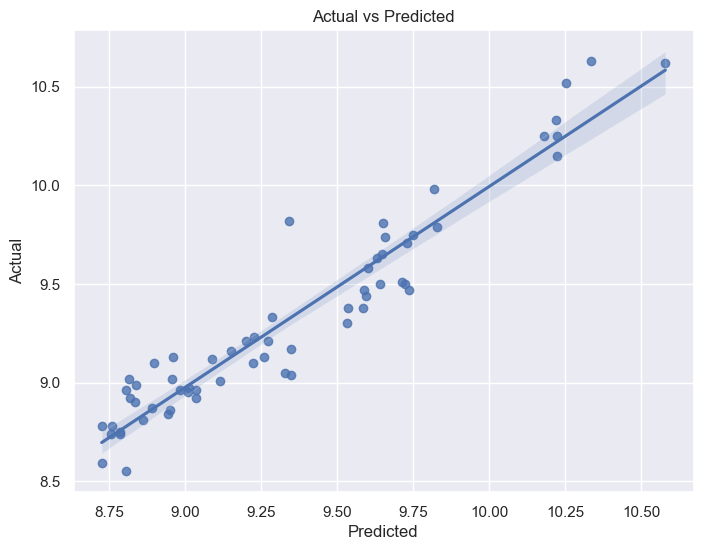

In [130]:
plt.figure(figsize=[8,6])
plt.title('Actual vs Predicted')
sns.regplot(x=actualvspredicted['Predicted']  ,y=actualvspredicted['Actual'] ,truncate =True )
plt.xlabel('Predicted')
plt.ylabel('Actual')

<div style="text-align: center;">
    <h1>pycaret Car price</h1>
</div>

In [132]:
from pycaret.regression import *


In [140]:
df.head()
df.columns

Index(['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price', 'gas',
       'turbo', 'hardtop', 'hatchback', 'sedan', 'wagon', 'fwd', 'rwd', 'rear',
       'dohcv', 'l', 'ohc', 'ohcf', 'ohcv', 'rotor', 'five', 'four', 'six',
       'three', 'twelve', '2bbl', '4bbl', 'idi', 'mfi', 'mpfi', 'spdi',
       'spfi'],
      dtype='object')

In [137]:
setup(df,target='price',session_id=42)

In [138]:
lr_1 = create_model('lr')

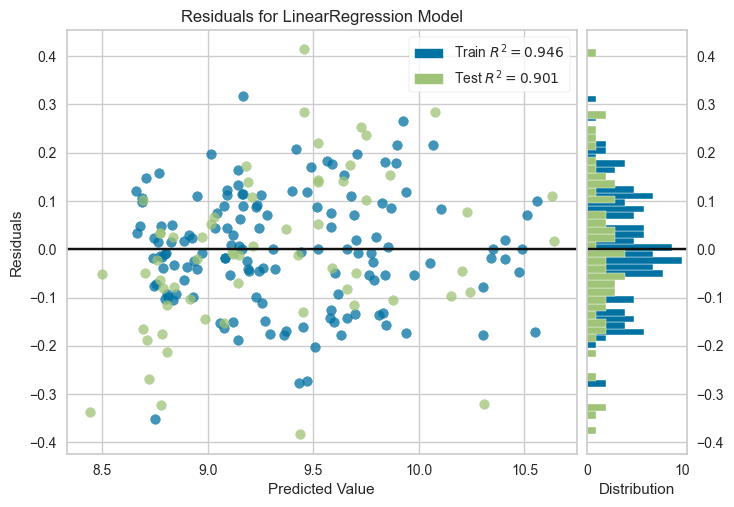

In [139]:
plot_model(lr_1)

In [141]:
best = compare_models(exclude = ['ransac'])

<div style="text-align: center;">
    <h2>CatboostRegressor pycaret</h2>
</div>

In [142]:
catboost_reg = create_model('catboost')

# tune a Model

In [144]:
tune_cat_reg = tune_model(catboost_reg)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


# Residual plot

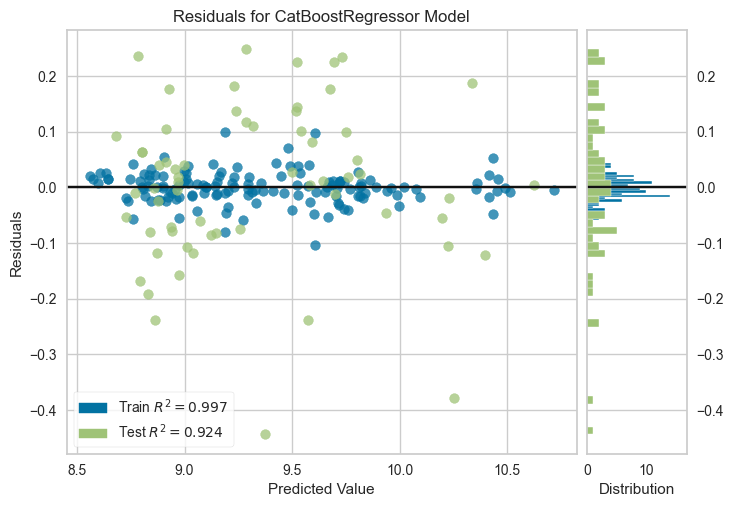

In [145]:
plot_model(tune_cat_reg)

# Error plot

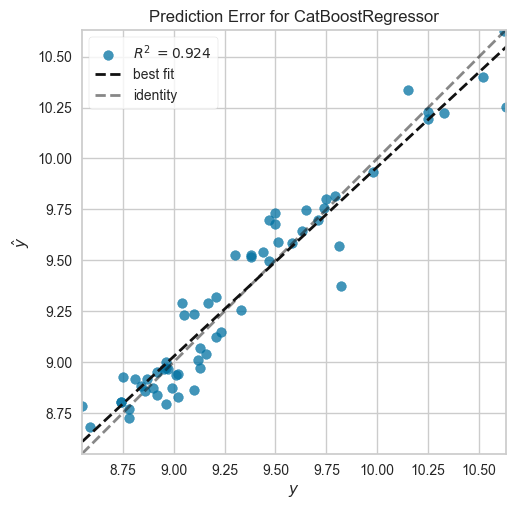

In [146]:
plot_model(tune_cat_reg,plot='error')

# Feature Importance 

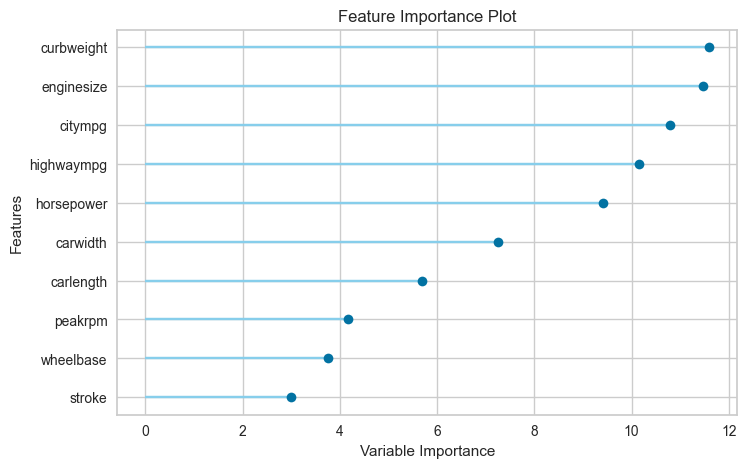

In [147]:
plot_model(tune_cat_reg,plot='feature')

In [148]:
save_model(tune_cat_reg, 'for_deployment_for_example1')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=C:\Users\Saman\AppData\Local\Temp\joblib),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['symboling', 'wheelbase',
                                              'carlength', 'carwidth',
                                              'carheight', 'curbweight',
                                              'enginesize', 'boreratio',
                                              'stroke', 'compressionratio',
                                              'horsepower', 'peakrpm', 'citympg',
                                              'highwaympg', 'gas', 'turbo',
                                              'hardtop', 'hatchback', 'sedan',
                                              'wagon', 'fwd', 'rwd', 'rear',
                                              'dohcv', 'l', 'ohc', 'ohcf',
                                              'ohcv', 'rotor', 'five', ...],
                                     transformer=S

<div style="text-align: center;">
    <h2>Light Gradient Boosting Machine pycaret</h2>
</div>

In [149]:
lightgbm_pycaret = create_model('lightgbm')

In [151]:
tune_light = tune_model(lightgbm_pycaret)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


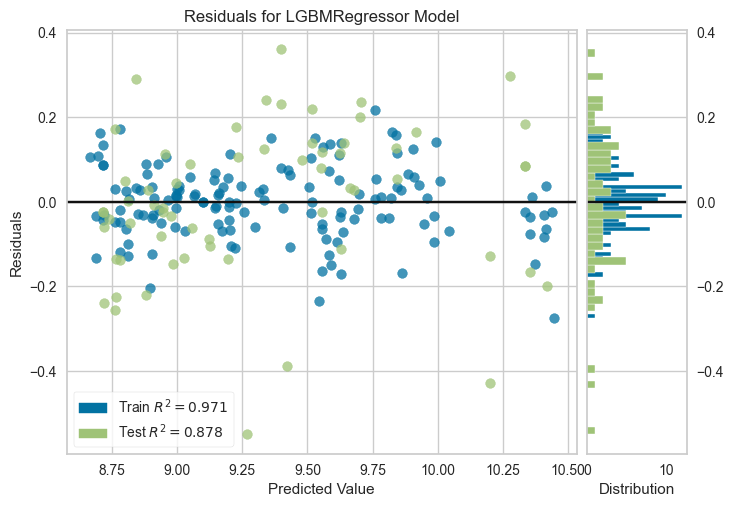

In [152]:
plot_model(tune_light, plot='residuals')

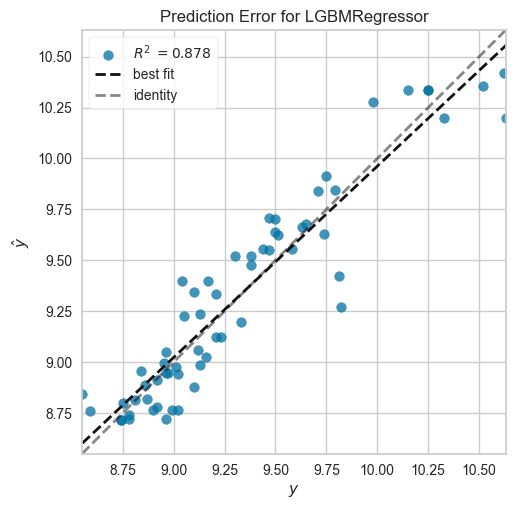

In [153]:
plot_model(tune_light, plot='error')

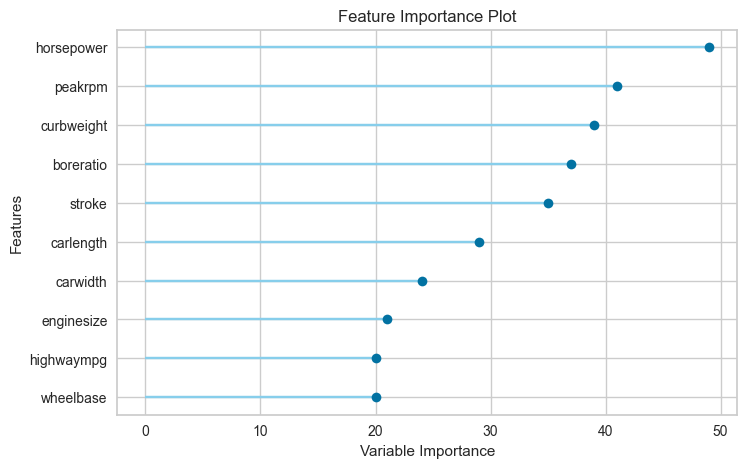

In [154]:
plot_model(tune_light, plot='feature')

In [155]:
save_model(tune_light, 'for_deployment_for_example1')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=C:\Users\Saman\AppData\Local\Temp\joblib),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['symboling', 'wheelbase',
                                              'carlength', 'carwidth',
                                              'carheight', 'curbweight',
                                              'enginesize', 'boreratio',
                                              'stroke', 'compressionratio',
                                              'horsepower', 'peakrpm', 'citympg',
                                              'highwaympg', 'gas', 'turbo',
                                              'hardtop', 'hatchback', 'sedan',
                                              'wagon', 'fwd', 'rwd', 'rear',
                                              'dohcv', 'l', 'ohc', 'ohcf',
                                              'ohcv', 'rotor', 'five', ...],
                                     transformer=S